# 1. IMPORTS

In [1]:
%matplotlib inline

# Dataset
import pandas            as pd
import numpy             as np
from shapely.geometry    import Point
from shapely.geometry    import Polygon
import geopandas         as gpd
import inflection
import seaborn           as sns
from IPython.display     import Image
import matplotlib.pyplot as plt
from matplotlib.ticker   import FuncFormatter
import pickle
import warnings
import math
from random              import sample

# Análises multivariadas
from tabulate    import tabulate
from scipy.stats import chi2_contingency
from sklearn     import metrics
from scipy       import stats


# Transformação dos dados
from sklearn.preprocessing   import RobustScaler, MinMaxScaler,StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import ExtraTreesClassifier
from boruta                  import BorutaPy
from sklearn                 import ensemble as en


# Machine learning
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import Lasso
from sklearn.ensemble        import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Avaliação do modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import random 

## 1.1 Definição de funções

In [2]:
def nome_distrito(x):
    for idx, _ in x.iterrows():
        if (df1['nome_do_distrito'].at[idx]=='SAï¿½DE'):
            df1['nome_do_distrito'].at[idx]='SAÚDE'
        if (df1['nome_do_distrito'].at[idx]=='VILA Sï¿½NIA'):
            df1['nome_do_distrito'].at[idx]='VILA SÔNIA'
        if (df1['nome_do_distrito'].at[idx]=='BUTANTï¿½'):
            df1['nome_do_distrito'].at[idx]='BUTANTÃ'
        if (df1['nome_do_distrito'].at[idx]=='CONSOLAï¿½ï¿½O'):
            df1['nome_do_distrito'].at[idx]='CONSOLAÇÃO'
        if (df1['nome_do_distrito'].at[idx]=='TREMEMBï¿½'):
            df1['nome_do_distrito'].at[idx]='TREMEMBÉ'
        if (df1['nome_do_distrito'].at[idx]=='ï¿½GUA RASA'):
            df1['nome_do_distrito'].at[idx]='ÁGUA RASA'
        if (df1['nome_do_distrito'].at[idx]=='SACOMï¿½'):
            df1['nome_do_distrito'].at[idx]='SACOMÃ'
        if (df1['nome_do_distrito'].at[idx]=='Sï¿½O LUCAS'):
            df1['nome_do_distrito'].at[idx]='SÃO LUCAS'
        if (df1['nome_do_distrito'].at[idx]=='CARRï¿½O'):
            df1['nome_do_distrito'].at[idx]='CARRÃO'
        if (df1['nome_do_distrito'].at[idx]=='TATUAPï¿½'):
            df1['nome_do_distrito'].at[idx]='TATUAPE'
        if (df1['nome_do_distrito'].at[idx]=='Sï¿½O MATEUS'):
            df1['nome_do_distrito'].at[idx]='SÃO MATEUS SÃO LUÍS'
        if (df1['nome_do_distrito'].at[idx]=='JARDIM Sï¿½O LUï¿½S'):
            df1['nome_do_distrito'].at[idx]='JARDIM SÃO LUÍS'
        if (df1['nome_do_distrito'].at[idx]=='Sï¿½O DOMINGOS'):
            df1['nome_do_distrito'].at[idx]=' SÃO DOMINGOS'
        if (df1['nome_do_distrito'].at[idx]=='BELï¿½M'):
            df1['nome_do_distrito'].at[idx]='BELÉM'
        if (df1['nome_do_distrito'].at[idx]=='JAGUARï¿½'):
            df1['nome_do_distrito'].at[idx]='JAGUARÉ'
        if (df1['nome_do_distrito'].at[idx]=='SANTA CECï¿½LIA'):
            df1['nome_do_distrito'].at[idx]='SANTA CECÍLIA'
        if (df1['nome_do_distrito'].at[idx]=='Sï¿½O RAFAEL'):
            df1['nome_do_distrito'].at[idx]='SÃO RAFAEL'
        if (df1['nome_do_distrito'].at[idx]=='FREGUESIA DO ï¿½'):
            df1['nome_do_distrito'].at[idx]='FREGUESIA DO Ó'
        if (df1['nome_do_distrito'].at[idx]=='VILA JACUï¿½'):
            df1['nome_do_distrito'].at[idx]=' VILA JACUÍ'
        if (df1['nome_do_distrito'].at[idx]=='CAPï¿½O REDONDO'):
            df1['nome_do_distrito'].at[idx]='CAPÃO REDONDO'
        if (df1['nome_do_distrito'].at[idx]=='JARAGUï¿½'):
            df1['nome_do_distrito'].at[idx]='JARAGUÁ'
        if (df1['nome_do_distrito'].at[idx]=='Sï¿½'):
            df1['nome_do_distrito'].at[idx]='SÉ'
        if (df1['nome_do_distrito'].at[idx]=='Sï¿½O MIGUEL'):
            df1['nome_do_distrito'].at[idx]='SÃO MIGUEL'
        if (df1['nome_do_distrito'].at[idx]=='VILA CURUï¿½ï¿½'):
            df1['nome_do_distrito'].at[idx]='VILLA CURUÇA'
        if (df1['nome_do_distrito'].at[idx]=='LIMï¿½O'):
            df1['nome_do_distrito'].at[idx]='LIMÃO'
        if (df1['nome_do_distrito'].at[idx]=='JAï¿½ANï¿½'):
            df1['nome_do_distrito'].at[idx]='JAÇANÃ'
        if (df1['nome_do_distrito'].at[idx]=='JARDIM ï¿½NGELA'):
            df1['nome_do_distrito'].at[idx]='JARDIM ÂNGELA'
        if (df1['nome_do_distrito'].at[idx]=='JOSï¿½ BONIFï¿½CIO'):
            df1['nome_do_distrito'].at[idx]='JOSÉ BONIFÁCIO'
        if (df1['nome_do_distrito'].at[idx]=='GRAJAï¿½'):
            df1['nome_do_distrito'].at[idx]='GRAJAÚ'
        if (df1['nome_do_distrito'].at[idx]=='REPï¿½BLICA'):
            df1['nome_do_distrito'].at[idx]='REPÚBLICA'
        else:
            df1['nome_do_distrito']  

# Padrão para plotagens
def data_load(ax1, title, xlabel, ylabel):
    ax1.set_title(title,  fontsize=15)
    ax1.set_xlabel(xlabel, fontsize=15)
    ax1.set_ylabel(ylabel, fontsize=15)
    return None  

def cramer_v(x, y):
    cm = pd.crosstab(x, y).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = stats.chi2_contingency(cm)[0]
    chi2_corrected = chi2 - ((k - 1)*(r - 1))/(n - 1)
    k_corrected = k - ((k - 1)**2)/(n - 1)
    r_corrected = r - ((r - 1)**2)/(n - 1)
    
    return np.sqrt((chi2_corrected/n) / (min(k_corrected - 1, r_corrected - 1)))

def atributo_frequencia(atributo):
    
    # Cria um dicionário de valores contáveis
    atributo_dict = atributo.value_counts().to_dict()
    
    # Armazena valores com Dataframe
    df_atributo_dict = pd.DataFrame(atributo_dict.items(), columns=['Value','Count'])

    # Calcula a frequência de cada valor
    df_atributo_dict['frequency'] = df_atributo_dict['Count'] / df_atributo_dict['Count'].sum()
    
    # Obtém um dicionário para a frequência
    atributo_frequencia = df_atributo_dict.set_index('Value').to_dict()['frequency']
    
    return atributo_frequencia


def frequencias_codificadas(data_frame):
    
    # Cria um Dataframe vazio
    freq_codificada = pd.DataFrame()
    
    # Cria colunas de frequências
    for column in data_frame.columns:
        freq_codificada[column] = data_frame[column].map(atributo_frequencia(data_frame[column]))
        
    return freq_codificada


# Média das porcentagens dos erros (MPE)
def mean_percentage_error(y, yhat):
    return np.mean((y - yhat) / y)
            
               

            

## 1.2 Carregando Dados

In [3]:
warnings.filterwarnings('ignore')

url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
data = pd.read_csv(url)

# 2 Descrição dos dados

## 2.1 Observação dos dados

In [4]:
data.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
771,Rua Cardeal Cagliori,Alto de Pinheiros,São Paulo,550,4,5,8,R$ 3.350.000
5529,Travessa Estrela,Conjunto Promorar Raposo Tavares,São Paulo,240,6,5,1,R$ 500.000
8356,Rua Estados Unidos,Jardim Paulista,São Paulo,230,5,6,5,R$ 15.000\n /Mês
2804,Avenida Giovanni Gronchi,Morumbi,São Paulo,388,3,4,6,R$ 1.500.000
9478,"Rua Moncorvo Filho, 297",Butantã,São Paulo,380,6,3,5,R$ 2.690.000
3533,NaN,Jardim Paulista,São Paulo,850,4,6,10,R$ 13.500.000
3070,Rua Afonso Ferreira,Jardim Paulista,São Paulo,550,4,7,4,R$ 12.000.000
4674,Rua Senador Carlos Teixeira de Carvalho,Cambuci,São Paulo,220,3,3,1,R$ 1.600.000
74,Rua Caetano Braga,Conjunto Residencial José Bonifácio,São Paulo,129,3,2,2,R$ 490.000
605,NaN,Alto de Pinheiros,São Paulo,298,4,6,4,R$ 3.200.000


### 2.1.1 Formatação dos dados

In [5]:
data[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = data["Valor"].str.split(expand = True)
data["Apenas_rua"] = data["Rua"].str.extract(r'(^[\w ]+)')
data["Apenas_rua"] = data["Apenas_rua"].str.lower().str.strip()
data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Apenas_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,rua tobias barreto


## 2.2 Junção de Datasets

Precisaremos fazer as criações de recursos e junções com alguns datasets do IBGE e dados censitários da cidade de São Paulo para futuramente termos uma acurácia mais precisa. 

### 2.2.1 Dados de códigos IBGE

Nesse módulo, teremos a base de dados dos códigos do IBGE da cidade de São Paulo.

In [4]:
# Dados de códigos IBGE com codificação legível
ibge_sp = pd.read_csv(
    'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv',
    encoding='ISO-8859-1',
    sep=';', thousands='.', decimal=','
)
ibge_sp.dropna(how='all', axis=1, inplace=True)
ibge_sp.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


### 2.2.2 Dados de SP
* Nesse módulo, teremos a base de dados dos endereçõs de São Paulo.

* Vamos criar o recurso **rua** para permitir fazer a junção com a base de dados dos imóveis de São Paulo.

* Vamos selecionar apenas as siglas de São Paulo, pois corre o risco de usar ruas com mesmos nomes e siglas diferentes na junção futuramente.

In [55]:
enderecos = pd.read_csv("datasets/enderecos.csv")

enderecos["rua"] = enderecos["tipo_logr"] + " " + enderecos["logr_nome"]
enderecos["rua"] = enderecos["rua"].str.lower().str.strip()

enderecos = enderecos.query("sigla_uf == 'SP'")

enderecos.head(3)

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.0,-21.190276,-50.448686,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.0,-22.756531,-47.343738,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.0,-22.743734,-47.348631,rua a


In [57]:
# Junção com a base 'dados' dos imóveis SP
data_geo = pd.merge(left = data, right = enderecos[["rua", "cep", "latitude", "longitude"]], how = "left", left_on = "Apenas_rua", right_on = "rua").drop_duplicates(subset=data.columns).query("cep > 0")
data_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Apenas_rua,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,avenida itacira,avenida itacira,11443160.0,-23.975993,-46.201317
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.0,-23.640961,-46.688311
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,rua alba valdez,rua alba valdez,4845200.0,-23.752990,-46.695889
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,NaN,NaN,18125000.0,-23.531043,-47.255023
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,rua tobias barreto,rua tobias barreto,13474663.0,-22.698901,-47.294461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101041,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,rua tapuçu,rua tapuçu,4671185.0,-23.661018,-46.691521
101042,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,rua guararema,rua guararema,13030640.0,-22.922749,-47.076960
101059,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,rua estero belaco,rua estero belaco,4145020.0,-23.616124,-46.632983
101060,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês,R$,2.200,/Mês,rua manuel onha,rua manuel onha,3192100.0,-23.572579,-46.577669


### 2.2.3 Base de Dados Setor Censitário
* Nesse módulo, utilizares dados com o objetivo de usar as geocodificações na base de dados principal.Criaremos os recursos **Point** e **setor_censo** devido à utilização dessas geocodificações e as latitudes e longitudes da base de dados principal.

* Selecionaremos apenas setor censo de São Paulo, para não corrermos o risco de usarmos setor censo igual de outro município futuramente, então será necessário selecionar agora.


* Devido à uma perda de tempo enorme no carregamento do **setor_censo** por completo(criamos apenas 10 valores), temos os dados salvos em .csv. Esse arquivo .csv será usado no módulo **2.3.4** ja com alguns recursos adicionados como **Valor_anuncio**(valor colocado no tipo float), **Valor_m2**(Valor do m2) e **Valor_mm**(valor na escala de milhão), além da remoção de dados  **'/Mês', '/Ano', '/Dia'** , pois aluguéis não contam e recursos **Moeda** e **apenas_rua**, pois são inúteis.


In [59]:
setor_censo = gpd.read_file('datasets/35SEE250GC_SIR.shp')

setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"]

setor_censo.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.0,354100005000009,URBANO,35410000500,NaN,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.0,354100005000004,URBANO,35410000500,NaN,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.0,354100005000002,URBANO,35410000500,NaN,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.0,354100005000001,URBANO,35410000500,NaN,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.0,354100005000003,URBANO,35410000500,NaN,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


Devido à uma perda de tempo enorme no carregamento do setor_censo por completo(criamos apenas 10 valores), temos os dados salvos em .csv.

In [159]:
# Criando recurso 'Point'
data_geo["Point"] = ""
for i in data_geo.index:
    data_geo["Point"][i] = Point(data_geo["longitude"][i], data_geo["latitude"][i])

# Criando recurso 'setor_censo' limitando até 10, pois demora muito a carregar  
data_geo['setor_censo'] = data_geo["Point"][:10].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]   
data_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Apenas_rua,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,avenida itacira,avenida itacira,11443160.0,-23.975993,-46.201317,POINT (-46.2013172 -23.975993),NaN
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.0,-23.640961,-46.688311,POINT (-46.6883114 -23.6409612),355030871000023
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,rua alba valdez,rua alba valdez,4845200.0,-23.752990,-46.695889,POINT (-46.6958895 -23.75299),355030830000050
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,NaN,NaN,18125000.0,-23.531043,-47.255023,POINT (-47.2550228 -23.5310431),NaN
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,rua tobias barreto,rua tobias barreto,13474663.0,-22.698901,-47.294461,POINT (-47.2944609 -22.6989009),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101041,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,rua tapuçu,rua tapuçu,4671185.0,-23.661018,-46.691521,POINT (-46.6915206 -23.661018),NaN
101042,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,rua guararema,rua guararema,13030640.0,-22.922749,-47.076960,POINT (-47.0769595 -22.9227492),NaN
101059,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,rua estero belaco,rua estero belaco,4145020.0,-23.616124,-46.632983,POINT (-46.632983 -23.6161237),NaN
101060,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês,R$,2.200,/Mês,rua manuel onha,rua manuel onha,3192100.0,-23.572579,-46.577669,POINT (-46.5776693 -23.5725787),NaN


Recursos que o arquivo .csv ja terá em seus dados no módulo 2.3.4.

In [ ]:
# Removendo dados '/Mês', '/Ano', '/Dia', pois aluguéis não contam
# data_geo = data_geo[data_geo["Tipo_anuncio"].isnull()]

# Criando recurso 'Valor_anuncio' e deixando tipo 'float'
# data_geo["Valor_anuncio"] = data_geo["Valor_anuncio"].str.replace(".","").astype(float)

# Removendo recurso 'Moeda' e 'apenas_rua', pois são inúteis
# data_geo = data_geo.drop(columns=['Moeda','Apenas_rua' ])

# Criando recurso 'Valor_m2' como valor do m2
# data_geo["Valor_m2"] = data_geo["Valor_anuncio"]/data_geo["Metragem"]

# Criando recurso 'Valor_mm' como valor na escala de milhão
# data_geo["Valor_mm"] = data_geo["Valor_anuncio"]/1000000

# data_geo.head()

### 2.2.4 Dados completo

* Teremos a junção da base de dados ajustados nos módulos anterioes e a base de dados de códigos do IBGE.
* Os dados ajustados nos módulos anteriores vai ser representando por um arquivo .csv pronto.

In [5]:
# arquivo .csv pronto
data_geo = pd.read_csv("datasets/dados_geo.csv")
data_geo.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.0,NaN,7.00,7000.000000,Avenida Itacira,4061000.0,-23.615793,-46.648162,POINT (-46.6481622 -23.6157934),3.550309e+14
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.0,NaN,3.70,7459.677419,Rua Aurelia Perez Alvarez,4642020.0,-23.640961,-46.688311,POINT (-46.6883114 -23.6409612),3.550309e+14
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.0,NaN,0.38,3040.000000,Rua Alba Valdez,4845200.0,-23.752990,-46.695889,POINT (-46.6958895 -23.75299),3.550308e+14


In [6]:
# Junção da base de dados principal com a base de dados de códigos do IBGE.
data_vendas_censo = pd.merge(left = data_geo, right = ibge_sp, how = "left", left_on = "setor_censo", right_on = "Cod_setor")

data_vendas_censo.rename(columns={'Rua':'rua1'},inplace=True)
data_vendas_censo.rename(columns={'Cod_Grandes Regiï¿½es':'cod_grandes_regioes'},inplace=True)

cols = tuple(map(lambda x: inflection.underscore(x), data_vendas_censo.columns))
data_vendas_censo.columns = cols

df1 = data_vendas_censo.copy()

## 2.3 Observação e dimensão dos dados completos

In [7]:
df1.iloc[:,:20].head(3)

,rua1,bairro,cidade,metragem,quartos,banheiros,vagas,valor,valor_anuncio,tipo_anuncio,valor_mm,valor_m2,rua,cep,latitude,longitude,point,setor_censo,cod_setor,cod_grandes_regioes
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.0,NaN,7.00,7000.000000,Avenida Itacira,4061000.0,-23.615793,-46.648162,POINT (-46.6481622 -23.6157934),3.550309e+14,3.550309e+14,3.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.0,NaN,3.70,7459.677419,Rua Aurelia Perez Alvarez,4642020.0,-23.640961,-46.688311,POINT (-46.6883114 -23.6409612),3.550309e+14,3.550309e+14,3.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.0,NaN,0.38,3040.000000,Rua Alba Valdez,4845200.0,-23.752990,-46.695889,POINT (-46.6958895 -23.75299),3.550308e+14,3.550308e+14,3.0


In [8]:
df1.iloc[:,20:40].head(3)

,nome_grande_regiao,cod_uf,nome_da_uf,cod_meso,nome_da_meso,cod_micro,nome_da_micro,cod_rm,nome_da_rm,cod_municipio,nome_do_municipio,cod_distrito,nome_do_distrito,cod_subdistrito,nome_do_subdistrito,cod_bairro,nome_do_bairro,situacao_setor,tipo_setor,v001
0,Regiï¿½o Sudeste,35.0,Sï¿½o Paulo,3515.0,Metropolitana de Sï¿½o Paulo,35061.0,Sï¿½o Paulo,20.0,RM Sï¿½o Paulo,3550308.0,Sï¿½O PAULO,355030877.0,SAï¿½DE,3.550309e+10,SAï¿½DE,3.550308e+09,Sï¿½O PAULO (todos os setores),1.0,0.0,164.0
1,Regiï¿½o Sudeste,35.0,Sï¿½o Paulo,3515.0,Metropolitana de Sï¿½o Paulo,35061.0,Sï¿½o Paulo,20.0,RM Sï¿½o Paulo,3550308.0,Sï¿½O PAULO,355030871.0,SANTO AMARO,3.550309e+10,SANTO AMARO,3.550308e+09,Sï¿½O PAULO (todos os setores),1.0,0.0,136.0
2,Regiï¿½o Sudeste,35.0,Sï¿½o Paulo,3515.0,Metropolitana de Sï¿½o Paulo,35061.0,Sï¿½o Paulo,20.0,RM Sï¿½o Paulo,3550308.0,Sï¿½O PAULO,355030830.0,GRAJAï¿½,3.550308e+10,GRAJAï¿½,3.550308e+09,Sï¿½O PAULO (todos os setores),1.0,0.0,142.0


In [9]:
df1.iloc[:,40:].head(3)

,v002,v003,v004,v005,v006,v007,v008,v009,v010,v011,v012
0,437.0,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,425.0,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,493.0,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88


* **v001** - Domicílios particulares permanentes ou pessoas responsáveis por domicílios particulares permanentes 
* **v002** - Moradores em domicílios particulares permanentes ou população residente em domicílios particulares permanentes 
* **v003** - Média do número de moradores em domicílios particulares permanentes (obtida pela divisão de Var2 por Var1)
* **v004** - Variância do número de moradores em domicílios particulares permanentes
* **v005** - Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)
* **v006** - Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)
* **v007** - Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)
* **v008** - Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)
* **v009** - Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)
* **v010** - Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)
* **v011** - Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com rendimento)
* **v012** - Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com rendimento)

In [10]:
print('{} linhas'.format(df1.shape[0]))
print('{} colunas'.format(df1.shape[1]))

5605 linhas
51 colunas


## 2.4 Formatação dos dados

Vamos excluir algumas colunas que sabemos que não iremos usar para não atrapalhar na interpretação das estatísticas decscritivas mais a frente.

In [11]:
# Excluindo coluna inútil
df1.drop(['tipo_anuncio','valor'], axis=1, inplace=True)

# Excluindo colunas com valores únicos 
df1.drop(['cidade','cod_grandes_regioes','nome_grande_regiao','cod_uf','nome_da_uf ','cod_meso','nome_da_meso','cod_micro','nome_da_micro','cod_rm',
                       'nome_da_rm','cod_municipio','nome_do_municipio','cod_bairro','nome_do_bairro'], axis=1, inplace=True)

# Excluindo colunas que se repetem
df1.drop(['cod_setor','cod_distrito','cod_subdistrito','nome_do_subdistrito'], axis=1, inplace=True)

# Excluindo colunas que ja foram utilizadas e se tornaram inúteis
df1.drop(['rua1','latitude','longitude','point'], axis=1, inplace=True)

In [12]:
# Retirar notação científica do 'setor_censo' para deixa-lo mais legível
df1['setor_censo'] = (df1[['setor_censo']]/1000000000)
print(df1[['setor_censo']].head(3))

# Nomes dos distritos legivelmente
nome_distrito(df1)
print(df1[['nome_do_distrito']].head(3))

   setor_censo
0   355030.877
1   355030.871
2   355030.830
  nome_do_distrito
0            SAÚDE
1      SANTO AMARO
2           GRAJAÚ


## 2.5 Checando e Tratando os dados vazios

In [13]:
df1.isna().sum()

bairro                8
metragem              0
quartos               0
banheiros             0
vagas                 0
valor_anuncio         0
valor_mm              0
valor_m2              0
rua                   0
cep                   0
setor_censo         285
nome_do_distrito    289
situacao_setor      289
tipo_setor          289
v001                289
v002                289
v003                289
v004                289
v005                289
v006                289
v007                289
v008                289
v009                289
v010                289
v011                289
v012                289
dtype: int64

In [14]:
warnings.filterwarnings('ignore')

# Hipótese: Se é NA, talvez seja pela falta de informação dos locais
# O que foi feito:Colocamos nomes dos bairros vazios de acordo com as ruas localizadas no respectivos bairros
df1['bairro'].iloc[4454] = 'Vila Mariana'
df1['bairro'].iloc[4477] = 'Morumbi'
df1['bairro'].iloc[4540] = 'Morumbi'
df1['bairro'].iloc[4740] = 'Morumbi'
df1['bairro'].iloc[4765] = 'Morumbi'
df1['bairro'].iloc[4898] = 'Morumbi'
df1['bairro'].iloc[5158] = 'Morumbi'
df1['bairro'].iloc[5326] = 'Jardim Panorama'


# Hipótese: Se é NA, talvez seja pela falta de informação dos locais
# O que foi feito: A melhor solução encontrada foi pegar a moda das variáveis vazias por BAIRRO e preencher os dados que estão vazios  
# ja que os valores de cada bairro são semelhantes
df1['mode1'] = df1['bairro'].apply(lambda x: df1[['setor_censo']]
                                  .loc[df1['bairro']==x,'setor_censo'].mode().values).str[0] 
df1['setor_censo'] = df1.apply(lambda x: x['mode1'] if math.isnan(x['setor_censo']) else x['setor_censo'], axis=1)

df1['mode2'] = df1['bairro'].apply(lambda x: df1[['nome_do_distrito']]
                                  .loc[df1['bairro']==x,'nome_do_distrito'].mode().values).str[0]
df1['nome_do_distrito'] = df1.apply(lambda x: x['mode2'] if pd.isnull(x['nome_do_distrito']) else x['nome_do_distrito'], axis=1)

df1['mode3'] = df1['bairro'].apply(lambda x: df1[['situacao_setor']]
                                  .loc[df1['bairro']==x,'situacao_setor'].mode().values).str[0] 
df1['situacao_setor'] = df1.apply(lambda x: x['mode3'] if math.isnan(x['situacao_setor']) else x['situacao_setor'], axis=1)

df1['mode4'] = df1['bairro'].apply(lambda x: df1[['tipo_setor']]
                                  .loc[df1['bairro']==x,'tipo_setor'].mode().values).str[0]
df1['tipo_setor'] = df1.apply(lambda x: x['mode4'] if math.isnan(x['tipo_setor']) else x['tipo_setor'], axis=1)



# Mesma idéia da solução acima, apenas trocando a MODA pela MÉDIA ja que são variáveis contínuas
df1[['mean1','mean2','mean3','mean4','mean5',
                   'mean6','mean7','mean8','mean9','mean10',
                   'mean11','mean12']] = df1['bairro'].apply(lambda x: 
                                                                           df1[['v001','v002','v003','v004','v005','v006',
                                                                                              'v007','v008','v009','v010','v011','v012']].loc[df1['bairro']==x,['v001'
                                                                                              ,'v002','v003','v004','v005','v006',
                                                                                              'v007','v008','v009','v010','v011','v012']].mean())

df1['v001'] = df1.apply(lambda x: x['mean1'] if math.isnan(x['v001']) else x['v001'], axis=1)

df1['v002'] = df1.apply(lambda x: x['mean2'] if math.isnan(x['v002']) else x['v002'], axis=1)

df1['v003'] = df1.apply(lambda x: x['mean3'] if math.isnan(x['v003']) else x['v003'], axis=1)

df1['v004'] = df1.apply(lambda x: x['mean4'] if math.isnan(x['v004']) else x['v004'], axis=1)

df1['v005'] = df1.apply(lambda x: x['mean5'] if math.isnan(x['v005']) else x['v005'], axis=1)

df1['v006'] = df1.apply(lambda x: x['mean6'] if math.isnan(x['v006']) else x['v006'], axis=1)

df1['v007'] = df1.apply(lambda x: x['mean7'] if math.isnan(x['v007']) else x['v007'], axis=1)

df1['v008'] = df1.apply(lambda x: x['mean8'] if math.isnan(x['v008']) else x['v008'], axis=1)

df1['v009'] = df1.apply(lambda x: x['mean9'] if math.isnan(x['v009']) else x['v009'], axis=1)

df1['v010'] = df1.apply(lambda x: x['mean10'] if math.isnan(x['v010']) else x['v010'], axis=1)

df1['v011'] = df1.apply(lambda x: x['mean11'] if math.isnan(x['v011']) else x['v011'], axis=1)

df1['v012'] = df1.apply(lambda x: x['mean12'] if math.isnan(x['v012']) else x['v012'], axis=1)



df1.drop(['mode1','mode2','mode3','mode4','mean1','mean2','mean3','mean4','mean5',
                        'mean6','mean7','mean8','mean9','mean10',
                        'mean11','mean12'], axis=1, inplace=True)

# Hipótese: Se é NA, talvez seja pela falta de informação dos locais, pois são determinados bairros completamente sem informações em determinadas variáveis,
# logo, não podemos achar moda, media ou mediana
# O que foi feito:Apagaremos as outras 23 linhas ja que são bairros completamente sem informações e não conseguimos achar uma solução para elas
df1 = df1.dropna()

df1.isnull().sum()

bairro              0
metragem            0
quartos             0
banheiros           0
vagas               0
valor_anuncio       0
valor_mm            0
valor_m2            0
rua                 0
cep                 0
setor_censo         0
nome_do_distrito    0
situacao_setor      0
tipo_setor          0
v001                0
v002                0
v003                0
v004                0
v005                0
v006                0
v007                0
v008                0
v009                0
v010                0
v011                0
v012                0
dtype: int64

## 2.6 Alterando os Tipos de Dados

In [15]:
df1.dtypes

bairro               object
metragem              int64
quartos               int64
banheiros             int64
vagas                 int64
valor_anuncio       float64
valor_mm            float64
valor_m2            float64
rua                  object
cep                 float64
setor_censo         float64
nome_do_distrito     object
situacao_setor      float64
tipo_setor          float64
v001                float64
v002                float64
v003                float64
v004                float64
v005                float64
v006                float64
v007                float64
v008                float64
v009                float64
v010                float64
v011                float64
v012                float64
dtype: object

In [16]:
a = pd.CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ordered=True)
df1['quartos'] = df1['quartos'].astype( a )

b = pd.CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14], ordered=True)
df1['banheiros'] = df1['banheiros'].astype( b )

c = pd.CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13
                                    , 14, 15, 16, 20, 24, 25, 30, 38], ordered=True)
df1['vagas'] = df1['vagas'].astype( c )

df1['cep'] = df1['cep'].astype( str )

df1['setor_censo'] = df1['setor_censo'].astype( str )

d = pd.CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 8.0], ordered=True)
df1['situacao_setor'] = df1['situacao_setor'].astype( d )

e = pd.CategoricalDtype(categories=[0.0, 1.0], ordered=True)
df1['tipo_setor'] = df1['tipo_setor'].astype( e )

In [17]:
df1.dtypes

bairro                object
metragem               int64
quartos             category
banheiros           category
vagas               category
valor_anuncio        float64
valor_mm             float64
valor_m2             float64
rua                   object
cep                   object
setor_censo           object
nome_do_distrito      object
situacao_setor      category
tipo_setor          category
v001                 float64
v002                 float64
v003                 float64
v004                 float64
v005                 float64
v006                 float64
v007                 float64
v008                 float64
v009                 float64
v010                 float64
v011                 float64
v012                 float64
dtype: object

# 3 Estatística descritiva

Para entender o comportamento dos dados em cada atributo, é necessário entender as estatísticas por trás dele. As variáveis serão divididas entre atributos numéricos e categóricos, para melhor compreensão.

## 3.1 Atributos Numéricos

1. Vamos criar duas ferramentas(curtose, simetria e suas classificações) para facilitar as leituras .

2. Observamos valores altos nas curtoses de **metragem**, **valor_anuncio**, **v004**,**v006**, **v008**, **v010** e **v012** à valores discrepantes em ambos.

3. Observamos também valores altos nas curtoses de outras variáveis devido à valores elevados no ponto máximo, mas que não podemos fazer nada, pois são valores possíveis.

In [18]:
# Checando outliers e valores vazios
NA1 = df1.select_dtypes(['int32','int64', 'float64'])
NA1 = NA1.iloc[:,0:17]

Simetria = pd.DataFrame(NA1.apply(lambda x: x.skew())).round(2).T
Simetria.rename(index={0: 'Simetria'}, inplace=True)

Curtose = pd.DataFrame(NA1.apply(lambda x: x.kurtosis())).round(2).T
Curtose.rename(index={0: 'Curtose'}, inplace=True)

describe = NA1.describe().round(2)
m1 = pd.concat([describe, Simetria, Curtose], axis=0)
m1

,metragem,valor_anuncio,valor_mm,valor_m2,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,v011,v012
count,5582.00,5582.00,5582.00,5582.00,5582.00,5582.00,5582.00,5582.00,5582.00,5.582000e+03,5582.00,5.582000e+03,5582.00,5.582000e+03,5582.00,5.582000e+03
mean,333.18,2748054.90,2.75,7718.01,193.23,573.70,3.00,2.12,5865.13,1.902611e+08,6791.31,2.552582e+08,3254.36,1.087198e+08,4841.58,1.881602e+08
std,548.73,3600795.69,3.60,4840.16,76.76,231.24,0.38,0.92,5064.28,9.139587e+08,5899.16,1.721359e+09,2240.68,5.035809e+08,3600.38,1.308523e+09
min,20.00,13000.00,0.01,65.00,12.00,29.00,1.61,0.70,174.91,9.835548e+04,584.26,7.002107e+04,91.16,1.068146e+05,547.47,5.844021e+04
25%,160.00,850000.00,0.85,4717.62,137.00,409.00,2.78,1.72,2477.46,8.354686e+06,2916.62,8.490000e+06,1616.95,5.810353e+06,2329.76,6.530618e+06
50%,255.00,1610500.00,1.61,6443.61,192.00,557.00,3.02,2.05,4412.66,2.775845e+07,5186.20,2.805498e+07,2812.23,1.925218e+07,4011.58,2.297937e+07
75%,410.00,3191872.25,3.19,9166.67,242.00,716.00,3.28,2.38,7600.44,1.017790e+08,8837.76,1.062329e+08,4323.09,5.943449e+07,6182.71,7.461612e+07
max,37000.00,65000000.00,65.00,54166.67,781.00,2488.00,5.21,32.90,41175.73,1.943668e+10,50741.20,3.546862e+10,20651.94,9.521545e+09,40653.97,2.864207e+10
Simetria,53.70,5.31,5.31,2.53,0.63,1.01,-0.19,20.47,2.42,1.313000e+01,2.59,1.671000e+01,1.87,1.266000e+01,2.91,1.792000e+01
Curtose,3573.77,53.19,53.19,11.34,1.99,3.88,0.42,669.57,8.81,2.047400e+02,10.27,3.130400e+02,5.95,1.936100e+02,18.14,3.680500e+02


In [19]:
# Criando classe de curtose
Classe_curtose = pd.DataFrame(m1.loc["Curtose"].apply(lambda x:
                  'leptocúrtica_pos' if (x > 0)
                   else ' mesocúrtica' if (x == 0)
                   else 'platicúrtica_neg')).T
Classe_curtose.rename(index={'Curtose': 'Classe curtose'}, inplace=True)

#Criando classe de simetria
Classe_simetria = pd.DataFrame(m1.loc["Simetria"].apply(lambda x:
                  'quase simétrica' if (((x > 0) & (x < 0.5)) | ((x < 0) & (x > -0.5))) 
                   else 'pouco enviesado' if (((x > 0.5) & (x < 1.0)) | ((x < -0.5) & (x > -1.0))) 
                   else 'muito enviesado')).T
Classe_simetria.rename(index={'Simetria': 'Classe_simetria'}, inplace=True)

m1 = pd.concat([m1, Classe_curtose, Classe_simetria], axis=0)
m1

,metragem,valor_anuncio,valor_mm,valor_m2,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,v011,v012
count,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0
mean,333.18,2748054.9,2.75,7718.01,193.23,573.7,3.0,2.12,5865.13,190261123.72,6791.31,255258200.5,3254.36,108719848.37,4841.58,188160170.94
std,548.73,3600795.69,3.6,4840.16,76.76,231.24,0.38,0.92,5064.28,913958698.39,5899.16,1721358821.23,2240.68,503580862.11,3600.38,1308522529.64
min,20.0,13000.0,0.01,65.0,12.0,29.0,1.61,0.7,174.91,98355.48,584.26,70021.07,91.16,106814.59,547.47,58440.21
25%,160.0,850000.0,0.85,4717.62,137.0,409.0,2.78,1.72,2477.46,8354686.15,2916.62,8489999.86,1616.95,5810352.83,2329.76,6530618.43
50%,255.0,1610500.0,1.61,6443.61,192.0,557.0,3.02,2.05,4412.66,27758450.04,5186.2,28054977.65,2812.23,19252184.45,4011.58,22979370.58
75%,410.0,3191872.25,3.19,9166.67,242.0,716.0,3.28,2.38,7600.44,101778987.61,8837.76,106232909.61,4323.09,59434488.37,6182.71,74616122.94
max,37000.0,65000000.0,65.0,54166.67,781.0,2488.0,5.21,32.9,41175.73,19436679037.419998,50741.2,35468624352.669998,20651.94,9521545092.67,40653.97,28642067613.82
Simetria,53.7,5.31,5.31,2.53,0.63,1.01,-0.19,20.47,2.42,13.13,2.59,16.71,1.87,12.66,2.91,17.92
Curtose,3573.77,53.19,53.19,11.34,1.99,3.88,0.42,669.57,8.81,204.74,10.27,313.04,5.95,193.61,18.14,368.05


## 3.2 Atributos Categóricos

In [20]:
# Selecionando dados 'object' e 'category'
CA = df1.select_dtypes(['object','category'])
CA.apply( lambda x: x.unique().shape[0] )

bairro               578
quartos               11
banheiros             13
vagas                 21
rua                 2430
cep                 2430
setor_censo         1678
nome_do_distrito      92
situacao_setor         5
tipo_setor             2
dtype: int64

In [21]:
CA.describe()

,bairro,quartos,banheiros,vagas,rua,cep,setor_censo,nome_do_distrito,situacao_setor,tipo_setor
count,5582,5582,5582,5582,5582,5582,5582,5582,5582.0,5582.0
unique,578,11,13,21,2430,2430,1678,92,5.0,2.0
top,Alto de Pinheiros,3,3,2,Rua Alberto Faria,5459000.0,355030.802000017,MORUMBI,1.0,0.0
freq,206,2525,1179,1507,27,27,57,534,5571.0,5554.0


# 4 Filtrando o quadro de dados

In [22]:
df2 = df1.copy()

## 4.1 Checando outliers de atributos numéricos

Como observado nos dados numéricos, existem alguns com valores discrepantes. Após análises, observamos que esses valores não poderiam ser removidos devido ao tamanho reduzido do dataset.

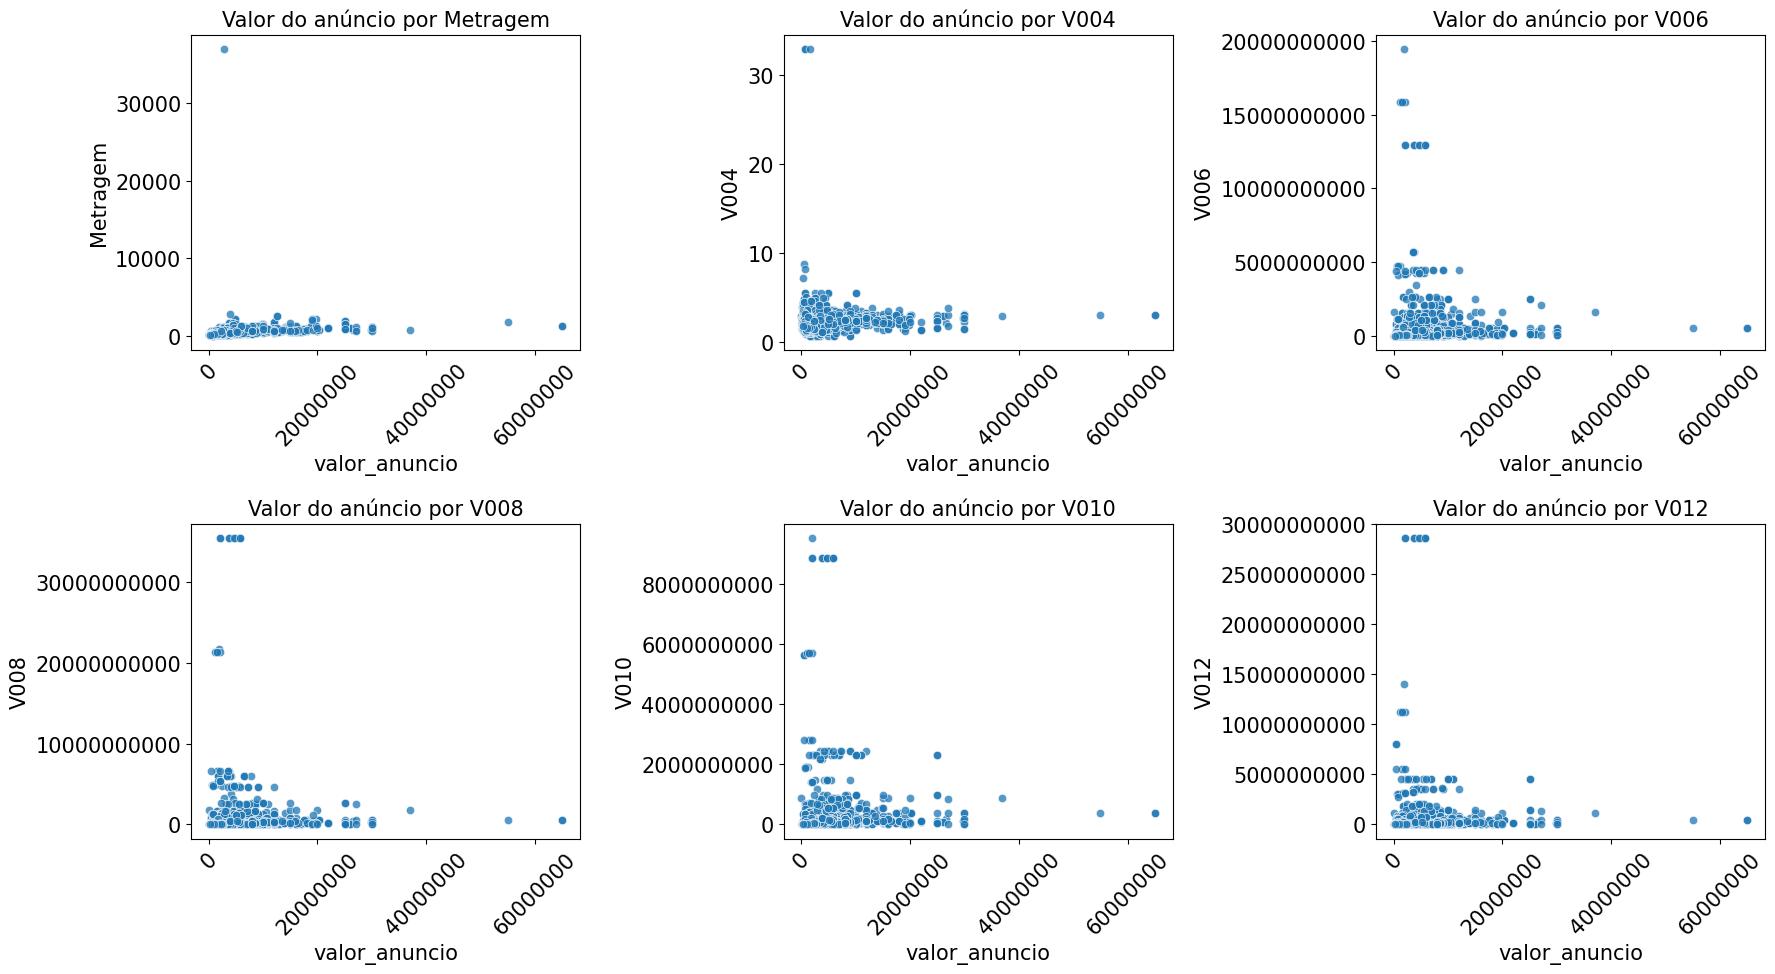

In [24]:
plt.figure(figsize=(18,10))

# Metragem
plt.subplot(2,3,1)
ax1 = sns.scatterplot(x='valor_anuncio', y='metragem', data=df2, palette='rainbow', alpha=0.75)
data_load(ax1 ,'Valor do anúncio por Metragem', 'valor_anuncio','Metragem' )

# v004
plt.subplot(2,3,2)
ax2 = sns.scatterplot(x='valor_anuncio', y='v004', data=df2, palette='rainbow', alpha=0.75)
data_load(ax2 ,'Valor do anúncio por V004', 'valor_anuncio','V004' )

# v006
plt.subplot(2,3,3)
ax3 = sns.scatterplot(x='valor_anuncio', y='v006', data=df2, palette='rainbow', alpha=0.75)
data_load(ax3 ,'Valor do anúncio por V006', 'valor_anuncio','V006' )

# v008
plt.subplot(2,3,4)
ax4 = sns.scatterplot(x='valor_anuncio', y='v008', data=df2, palette='rainbow', alpha=0.75)
data_load(ax4 ,'Valor do anúncio por V008', 'valor_anuncio','V008' )

# v010
plt.subplot(2,3,5)
ax5 = sns.scatterplot(x='valor_anuncio', y='v010', data=df2, palette='rainbow', alpha=0.75)
data_load(ax5 ,'Valor do anúncio por V010', 'valor_anuncio','V010' )

# v012
plt.subplot(2,3,6)
ax6 = sns.scatterplot(x='valor_anuncio', y='v012', data=df2, palette='rainbow', alpha=0.75)
data_load(ax6 ,'Valor do anúncio por V012', 'valor_anuncio','V012' )

ax1.ticklabel_format(style='plain', axis='x')
ax2.ticklabel_format(style='plain', axis='x')
ax3.ticklabel_format(style='plain', axis='x')
ax4.ticklabel_format(style='plain', axis='x')
ax5.ticklabel_format(style='plain', axis='x')
ax6.ticklabel_format(style='plain', axis='x')

ax3.ticklabel_format(style='plain', axis='y')
ax4.ticklabel_format(style='plain', axis='y')
ax5.ticklabel_format(style='plain', axis='y')
ax6.ticklabel_format(style='plain', axis='y')

ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)
ax4.tick_params(axis='x', rotation=45)
ax5.tick_params(axis='x', rotation=45)
ax6.tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=0.3)  

plt.tight_layout()

plt.rcParams.update({'font.size': 15})
    
plt.show()

Observando os valores nos gráficos, substituímos os valores discrepantes pelos valores máximos num intervalo determinado em cada coluna. Esse intervalo foi observado nos gráficos acima com o objetivo de dimunior o máximo possível os valores discrepantes.

In [25]:
# Substituindo outlierss
df2['valor_anuncio'] = df2['valor_anuncio'].apply(lambda x: 30000000 if (x > 30000000) else x)

df2['metragem'] = df2['metragem'].apply(lambda x: 2850 if (x > 10000) else x)

df2['v004'] = df2['v004'].apply(lambda x: 5.52 if (x > 6) else x)

df2['v006'] = df2['v006'].apply(lambda x: 1781723643.14 if (x > 2000000000) else x)

df2['v008'] = df2['v008'].apply(lambda x: 1374996829.42 if (x > 1500000000) else x)

df2['v010'] = df2['v010'].apply(lambda x: 976628790.68 if (x > 1000000000) else x)

df2['v012'] = df2['v012'].apply(lambda x: 1436259424.69 if (x > 1500000000) else x)

Como explicado no início desse módulo, os valores possíveis de serem substituídos foram alterados e os dados ficaram mais simétricos como observados nos gráficos e na tabela de estatística descritiva.Podemos observar também na tabela estatística que as curtoses e simetrias ficaram mais próximos de 0 deixando os dados mais próximos de uma distribuição normal. 

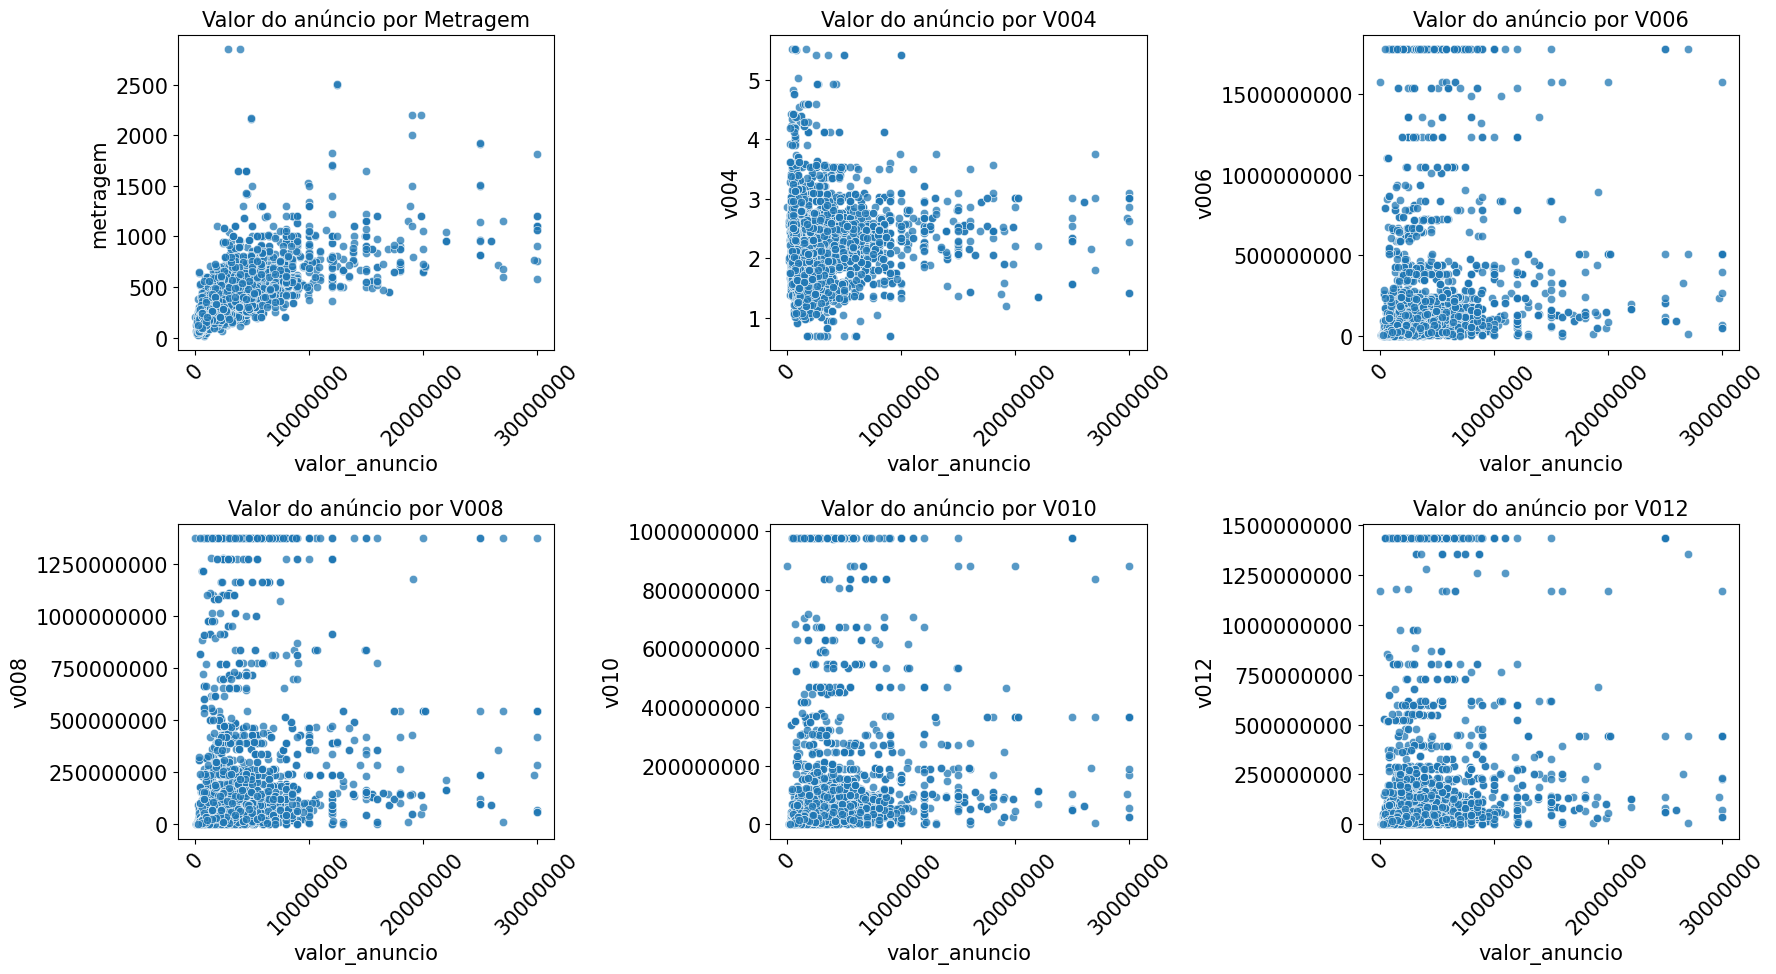

In [26]:
plt.figure(figsize=(18,10))

# Metragem
plt.subplot(2,3,1)
ax1 = sns.scatterplot(x='valor_anuncio', y='metragem', data=df2, palette='rainbow', alpha=0.75)
data_load(ax1 ,'Valor do anúncio por Metragem', 'valor_anuncio','metragem' )

# Código modelo veículo
plt.subplot(2,3,2)
ax2 = sns.scatterplot(x='valor_anuncio', y='v004', data=df2, palette='rainbow', alpha=0.75)
data_load(ax2 ,'Valor do anúncio por V004', 'valor_anuncio','v004' )

# Código versão veículo
plt.subplot(2,3,3)
ax3 = sns.scatterplot(x='valor_anuncio', y='v006', data=df2, palette='rainbow', alpha=0.75)
data_load(ax3 ,'Valor do anúncio por V006', 'valor_anuncio','v006' )

# Ano modelo
plt.subplot(2,3,4)
ax4 = sns.scatterplot(x='valor_anuncio', y='v008', data=df2, palette='rainbow', alpha=0.75)
data_load(ax4 ,'Valor do anúncio por V008', 'valor_anuncio','v008' )

# CEP
plt.subplot(2,3,5)
ax5 = sns.scatterplot(x='valor_anuncio', y='v010', data=df2, palette='rainbow', alpha=0.75)
data_load(ax5 ,'Valor do anúncio por V010', 'valor_anuncio','v010' )

# Valor anúncio
plt.subplot(2,3,6)
ax6 = sns.scatterplot(x='valor_anuncio', y='v012', data=df2, palette='rainbow', alpha=0.75)
data_load(ax6 ,'Valor do anúncio por V012', 'valor_anuncio','v012' )

ax1.ticklabel_format(style='plain', axis='x')
ax2.ticklabel_format(style='plain', axis='x')
ax3.ticklabel_format(style='plain', axis='x')
ax4.ticklabel_format(style='plain', axis='x')
ax5.ticklabel_format(style='plain', axis='x')
ax6.ticklabel_format(style='plain', axis='x')

ax3.ticklabel_format(style='plain', axis='y')
ax4.ticklabel_format(style='plain', axis='y')
ax5.ticklabel_format(style='plain', axis='y')
ax6.ticklabel_format(style='plain', axis='y')

ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)
ax4.tick_params(axis='x', rotation=45)
ax5.tick_params(axis='x', rotation=45)
ax6.tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=0.3)  

plt.tight_layout()

plt.rcParams.update({'font.size': 15})
    
plt.show()

In [27]:
# Checando outliers e valores vazios
NA1 = df2.select_dtypes(['int32','int64', 'float64'])
NA1 = NA1.iloc[:,0:17]

Simetria = pd.DataFrame(NA1.apply(lambda x: x.skew())).round(2).T
Simetria.rename(index={0: 'Simetria'}, inplace=True)

Curtose = pd.DataFrame(NA1.apply(lambda x: x.kurtosis())).round(2).T
Curtose.rename(index={0: 'Curtose'}, inplace=True)

describe = NA1.describe().round(2)
m1 = pd.concat([describe, Simetria, Curtose], axis=0)
m1

,metragem,valor_anuncio,valor_mm,valor_m2,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,v011,v012
count,5582.00,5582.00,5582.00,5582.00,5582.00,5582.00,5582.00,5582.00,5582.00,5.582000e+03,5582.00,5.582000e+03,5582.00,5.582000e+03,5582.00,5.582000e+03
mean,327.06,2729781.88,2.75,7718.01,193.23,573.70,3.00,2.10,5865.13,1.309811e+08,6791.31,1.305441e+08,3254.36,7.410509e+07,4841.58,1.009466e+08
std,247.59,3377796.65,3.60,4840.16,76.76,231.24,0.38,0.58,5064.28,3.008048e+08,5899.16,2.743761e+08,2240.68,1.629775e+08,3600.38,2.387980e+08
min,20.00,13000.00,0.01,65.00,12.00,29.00,1.61,0.70,174.91,9.835548e+04,584.26,7.002107e+04,91.16,1.068146e+05,547.47,5.844021e+04
25%,160.00,850000.00,0.85,4717.62,137.00,409.00,2.78,1.72,2477.46,8.354686e+06,2916.62,8.490000e+06,1616.95,5.810353e+06,2329.76,6.530618e+06
50%,255.00,1610500.00,1.61,6443.61,192.00,557.00,3.02,2.05,4412.66,2.775845e+07,5186.20,2.805498e+07,2812.23,1.925218e+07,4011.58,2.297937e+07
75%,410.00,3191872.25,3.19,9166.67,242.00,716.00,3.28,2.38,7600.44,1.017790e+08,8837.76,1.062329e+08,4323.09,5.943449e+07,6182.71,7.461612e+07
max,2850.00,30000000.00,65.00,54166.67,781.00,2488.00,5.21,5.52,41175.73,1.781724e+09,50741.20,1.374997e+09,20651.94,9.766288e+08,40653.97,1.436259e+09
Simetria,2.60,3.74,5.31,2.53,0.63,1.01,-0.19,1.39,2.42,4.000000e+00,2.59,3.370000e+00,1.87,4.010000e+00,2.91,4.250000e+00
Curtose,12.37,19.13,53.19,11.34,1.99,3.88,0.42,4.66,8.81,1.691000e+01,10.27,1.123000e+01,5.95,1.710000e+01,18.14,1.920000e+01


In [28]:
# Criando classe de curtose
Classe_curtose = pd.DataFrame(m1.loc["Curtose"].apply(lambda x:
                  'leptocúrtica_pos' if (x > 0)
                   else ' mesocúrtica' if (x == 0)
                   else 'platicúrtica_neg')).T
Classe_curtose.rename(index={'Curtose': 'Classe curtose'}, inplace=True)

#Criando classe de simetria
Classe_simetria = pd.DataFrame(m1.loc["Simetria"].apply(lambda x:
                  'quase simétrica' if (((x > 0) & (x < 0.5)) | ((x < 0) & (x > -0.5))) 
                   else 'pouco enviesado' if (((x > 0.5) & (x < 1.0)) | ((x < -0.5) & (x > -1.0))) 
                   else 'muito enviesado')).T
Classe_simetria.rename(index={'Simetria': 'Classe_simetria'}, inplace=True)

m1 = pd.concat([m1, Classe_curtose, Classe_simetria], axis=0)
m1

,metragem,valor_anuncio,valor_mm,valor_m2,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,v011,v012
count,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0,5582.0
mean,327.06,2729781.88,2.75,7718.01,193.23,573.7,3.0,2.1,5865.13,130981093.49,6791.31,130544078.74,3254.36,74105087.1,4841.58,100946583.56
std,247.59,3377796.65,3.6,4840.16,76.76,231.24,0.38,0.58,5064.28,300804833.29,5899.16,274376055.15,2240.68,162977491.77,3600.38,238797997.02
min,20.0,13000.0,0.01,65.0,12.0,29.0,1.61,0.7,174.91,98355.48,584.26,70021.07,91.16,106814.59,547.47,58440.21
25%,160.0,850000.0,0.85,4717.62,137.0,409.0,2.78,1.72,2477.46,8354686.15,2916.62,8489999.86,1616.95,5810352.83,2329.76,6530618.43
50%,255.0,1610500.0,1.61,6443.61,192.0,557.0,3.02,2.05,4412.66,27758450.04,5186.2,28054977.65,2812.23,19252184.45,4011.58,22979370.58
75%,410.0,3191872.25,3.19,9166.67,242.0,716.0,3.28,2.38,7600.44,101778987.61,8837.76,106232909.61,4323.09,59434488.37,6182.71,74616122.94
max,2850.0,30000000.0,65.0,54166.67,781.0,2488.0,5.21,5.52,41175.73,1781723643.14,50741.2,1374996829.42,20651.94,976628790.68,40653.97,1436259424.69
Simetria,2.6,3.74,5.31,2.53,0.63,1.01,-0.19,1.39,2.42,4.0,2.59,3.37,1.87,4.01,2.91,4.25
Curtose,12.37,19.13,53.19,11.34,1.99,3.88,0.42,4.66,8.81,16.91,10.27,11.23,5.95,17.1,18.14,19.2


### 4.2 Checando outliers de atributos categóricos

Aqui iremos mostrar o boxplot das variáveis categóricas com o objetivo de observar categorias discrepantes e comparar os possíveis **desvios padrões**, **médias**, **quartis**, **medianas** com os valores dos anúncios e observar possíveis correlações futuras ja que são dados categóricos com numérico(valor do anúncio). Podemos observar que algumas features são equilibradas no desvio padrão da própria coluna e de suas categorias, como também esses mesmos desempenhos não são similiares(correlações maiores).

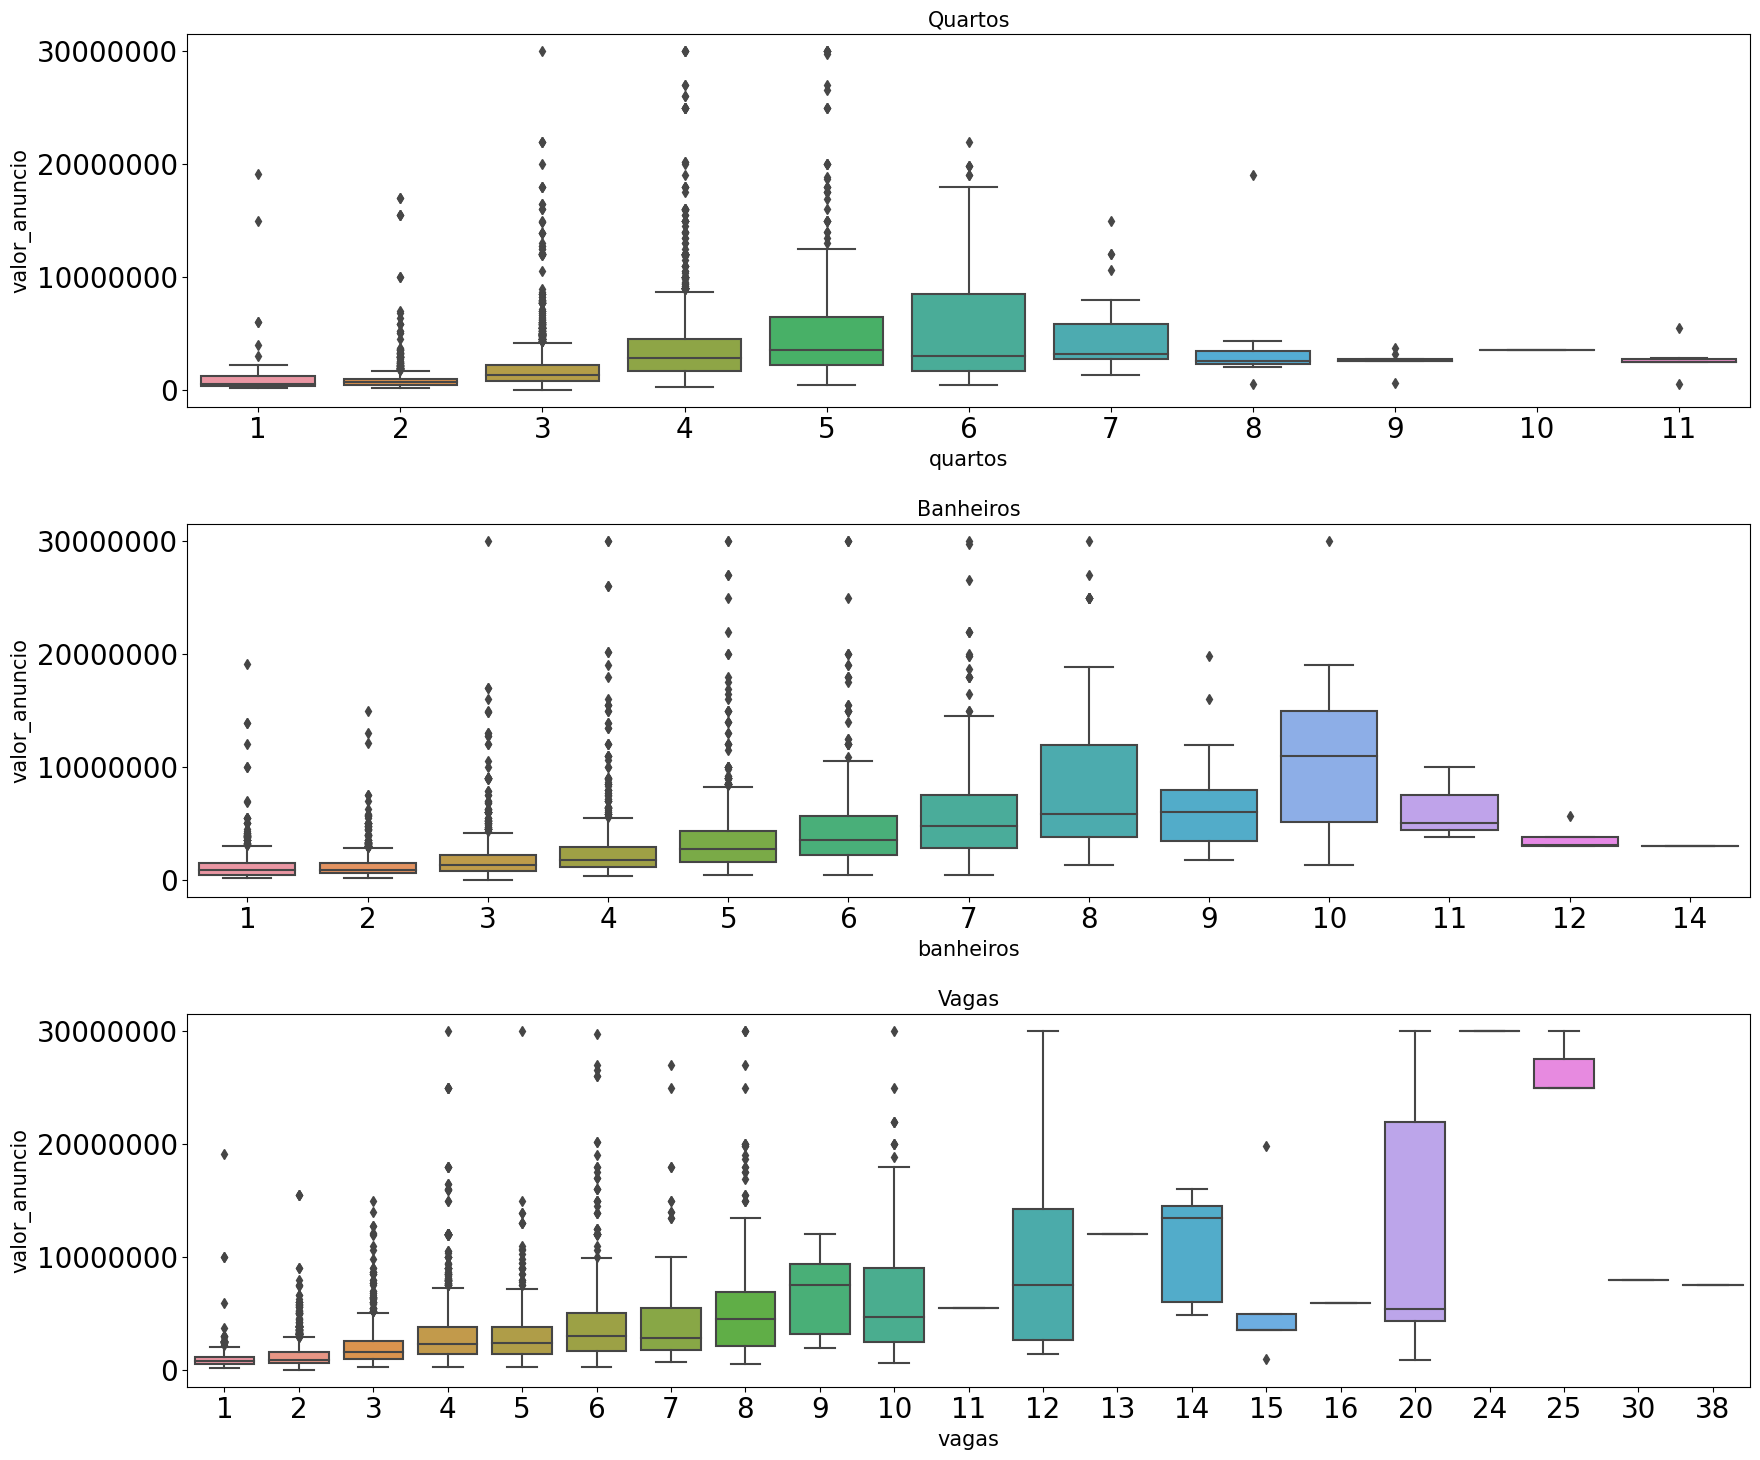

In [30]:
plt.figure(figsize=(18,15))

# Quartos
plt.subplot(3,1,1)
ax1 = sns.boxplot(data = df2, x="quartos", y="valor_anuncio")
data_load(ax1 ,'Quartos', 'quartos','valor_anuncio' )

# Banheiros
plt.subplot(3,1,2)
ax2 = sns.boxplot(data = df2, x="banheiros", y="valor_anuncio")
data_load(ax2 ,'Banheiros', 'banheiros','valor_anuncio' )

# Vagas
plt.subplot(3,1,3)
ax3 = sns.boxplot(data = df2, x="vagas", y="valor_anuncio")
data_load(ax3 ,'Vagas', 'vagas','valor_anuncio' )

ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')
ax3.ticklabel_format(style='plain', axis='y')

plt.subplots_adjust(hspace=0.5)  

plt.tight_layout()

plt.rcParams.update({'font.size': 20})

    
plt.show()

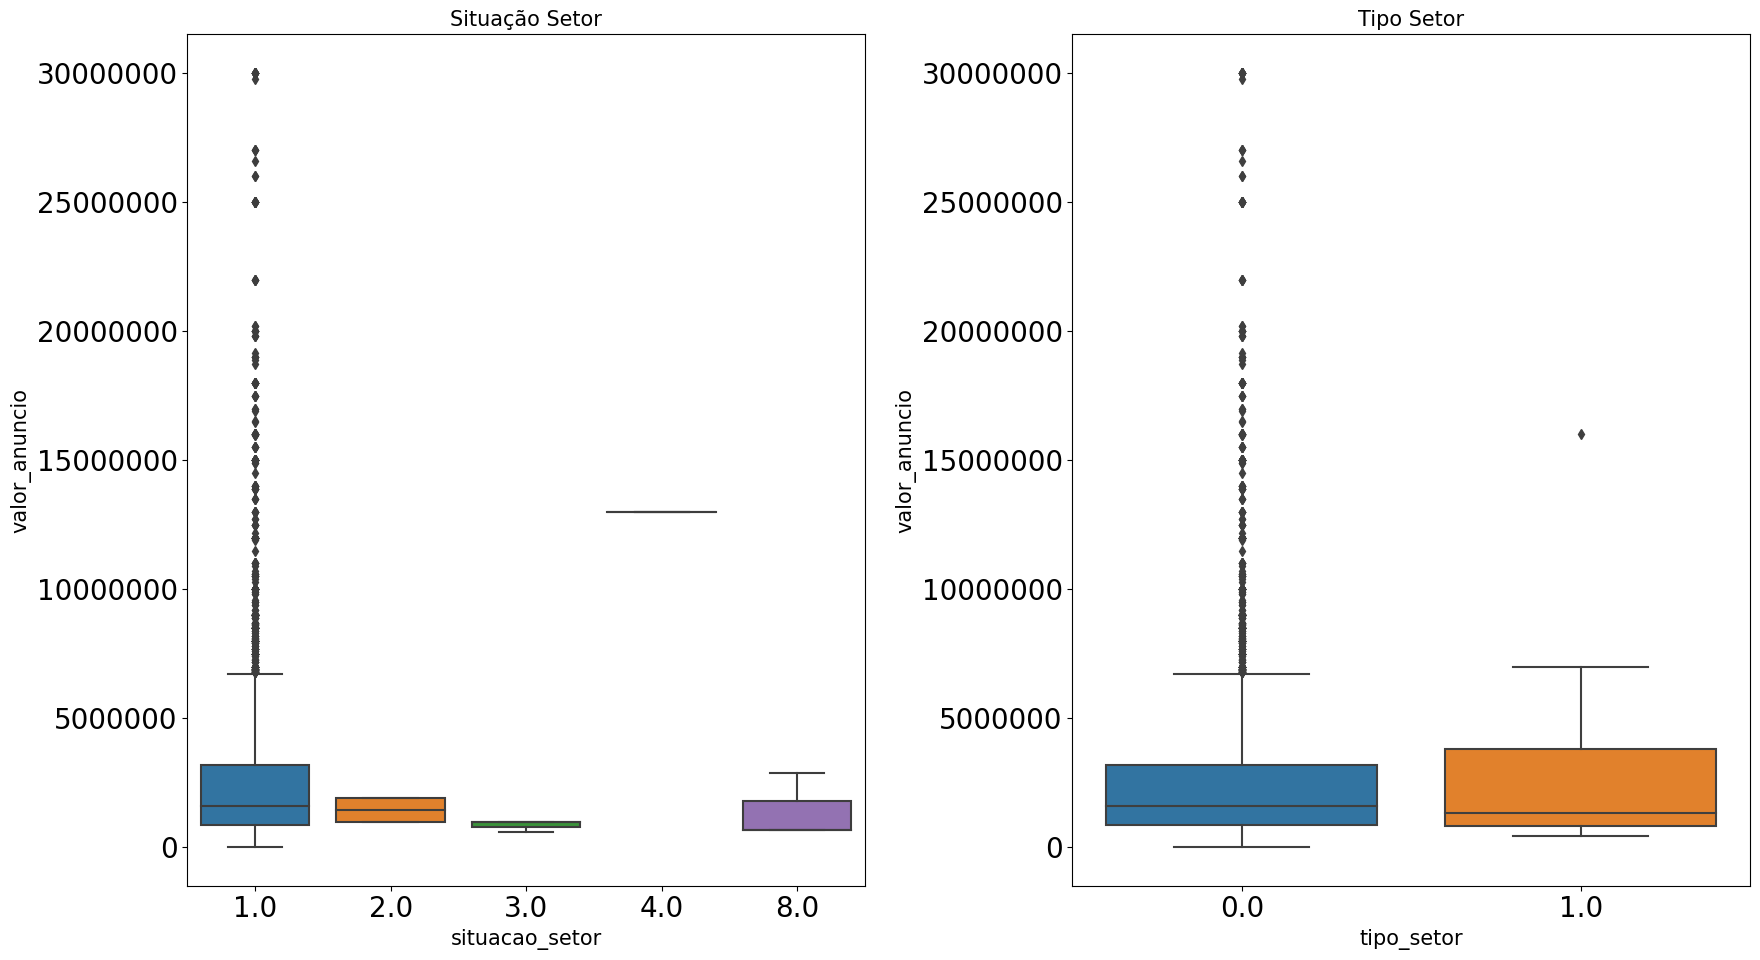

In [32]:
plt.figure(figsize=(18,10))

# Situação Setor
plt.subplot(1,2,1)
ax1 = sns.boxplot(data = df2, x="situacao_setor", y="valor_anuncio")
data_load(ax1 ,'Situação Setor', 'situacao_setor','valor_anuncio' )

# Tipo Setor
plt.subplot(1,2,2)
ax2 = sns.boxplot(data = df2, x="tipo_setor", y="valor_anuncio")
data_load(ax2 ,'Tipo Setor', 'tipo_setor','valor_anuncio' )

ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')

plt.subplots_adjust(hspace=0.5)  

plt.tight_layout()

plt.rcParams.update({'font.size': 20})

    
plt.show()

## 4.4 Checkpoint

In [33]:
# cópia do data set
df3 = df2.copy()

In [34]:
# salvar o data set 
df3.to_csv('data_saves/df3.csv', index=False)

# checar a dimensão do data set 
df3.shape

(5582, 26)

## 4.5 Mapa de Hipóteses

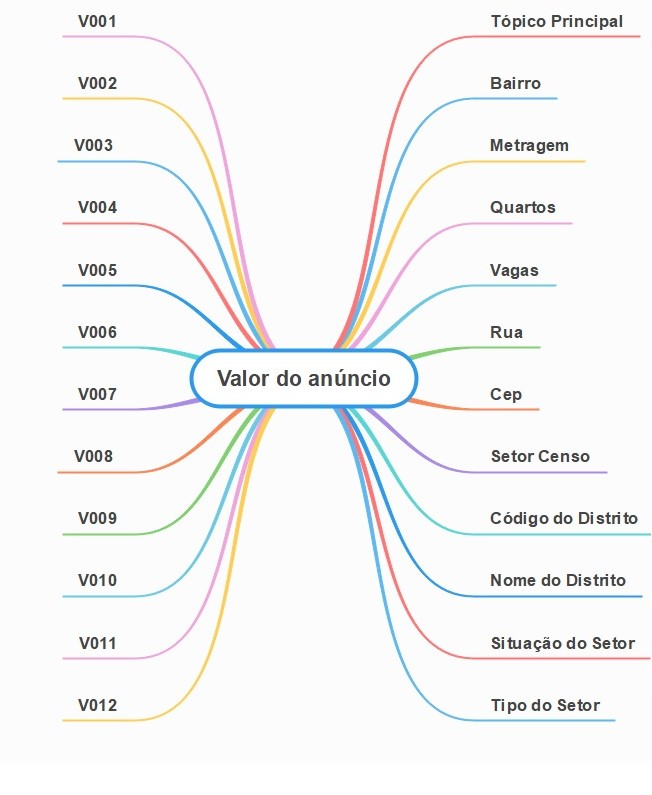

In [35]:
# Imagem do mapa de hipóteses
Image( 'images/Valor anuncio.jpg' )

## 4.6 Engenharia de Recursos

Neste tópico, a fim de melhorar o resultado final de Machine Learning, através de variáveis do dataset, criamos algumas features com novas informações para nos auxiliar.
* Através da coluna **cep** criamos 4 novas variáveis que são das **Sub_regiões**, **Setor**, **Sub_setor** e **Divisao_sub_setor** que são valores reais da cidade de São Paulo.

* Criamos também a **Quant_dom_part** que são as classificações de quantidades de domicílios particulares ou pessoas responsáveis por domicílios particulares permanentes e a **Quant_mor** que são as classificações de quantidades de moradores em domicílios particulares ou população residente em domicílios particulares permanentes


In [36]:
# sub regioes
df3['sub_regiões'] = df3['cep'].str.extract('([0-9])')
df3['sub_regiões'] = df3['sub_regiões'].astype(str)

# setor
df3['setor'] = df3['cep'].str[1]
df3['setor'] = df3['setor'].astype(str)

# sub setor
df3['sub_setor'] = df3['cep'].str[2]
df3['sub_setor'] = df3['sub_setor'].astype(str)

# divisao sub setor
df3['divisao_sub_setor'] = df3['cep'].str[3]
df3['divisao_sub_setor'] = df3['divisao_sub_setor'].astype(str)

# quant_dom_part
df3['quant_dom_part'] = ''
for idx, _ in df3.iterrows():
    if (df3['v001'].at[idx]<100):
        df3['quant_dom_part'].at[idx]='Pouco domicílio'
    elif (df3['v001'].at[idx]>=100) & (df3['v001'].at[idx]<200):
        df3['quant_dom_part'].at[idx]='Médio 1 domicílio'
    elif (df3['v001'].at[idx]>=200) & (df3['v001'].at[idx]<350):
        df3['quant_dom_part'].at[idx]='Médio 2 domicílio'
    else:
        df3['quant_dom_part'].at[idx]='Muito domicílio'
        
# quant_mor
df3['quant_mor'] = ''
for idx, _ in df3.iterrows():
    if (df3['v002'].at[idx]<200):
        df3['quant_mor'].at[idx]='Pouco morador'
    elif (df3['v002'].at[idx]>=200) & (df3['v002'].at[idx]<400):
        df3['quant_mor'].at[idx]='Médio 1 morador'
    elif (df3['v002'].at[idx]>=400) & (df3['v002'].at[idx]<600):
        df3['quant_mor'].at[idx]='Médio 2 morador'
    else:
        df3['quant_mor'].at[idx]='Muito morador'

In [37]:
df3.sample(5).T

,3316,326,4977,1818,3594
bairro,Jardim Cidade Pirituba,Jardim Consórcio,Planalto Paulista,Jardim Odete,Cidade Jardim
metragem,155,178,400,220,406
quartos,3,3,4,3,4
banheiros,2,4,6,5,4
vagas,2,3,4,4,6
valor_anuncio,355000.0,550000.0,1550000.0,1030000.0,2800000.0
valor_mm,0.355,0.55,1.55,1.03,2.8
valor_m2,2290.322581,3089.88764,3875.0,4681.818182,6896.551724
rua,Rua Custódio Guimarães,Rua Domingos Furtado Valadares,Alameda dos Tupinas,Rua Moisés Anaute,Rua das Begônias
cep,2943040.0,4437140.0,4069000.0,5363030.0,5676000.0


### 4.6.1 Checkpoint

In [38]:
# cópia do data set
df4 = df3.copy()

# salvar o data set 
df4.to_csv('data_saves/df4.csv', index=False)

# checar a dimensão do data set 
df4.shape

(5582, 32)

# 5 Questões e Hipóteses

**1**. Os 10 bairros com mais imóveis em São Paulo, seguem a mesma ordem nos somatório dos preços dos imóveis. 

**2**. Os 10 bairros com mais imóveis em São Paulo seguem a mesma ordem no número de vagas e quartos nos imóveis de acordo com suas metragens

**3**. Os 10 bairros com mais imóveis em São Paulo seguem a mesma ordem na faixa das metragens e preços/m² dos imóveis.

**4**. Os valores das médias apenas de pessoas com rendimento nominal médio mensal é diretamente proporcional ao valor dos imóveis/m².

# 6 Análise Exploratória dos Dados

## 6.1 Análises Univariadas

### 6.1.1 Variável Alvo

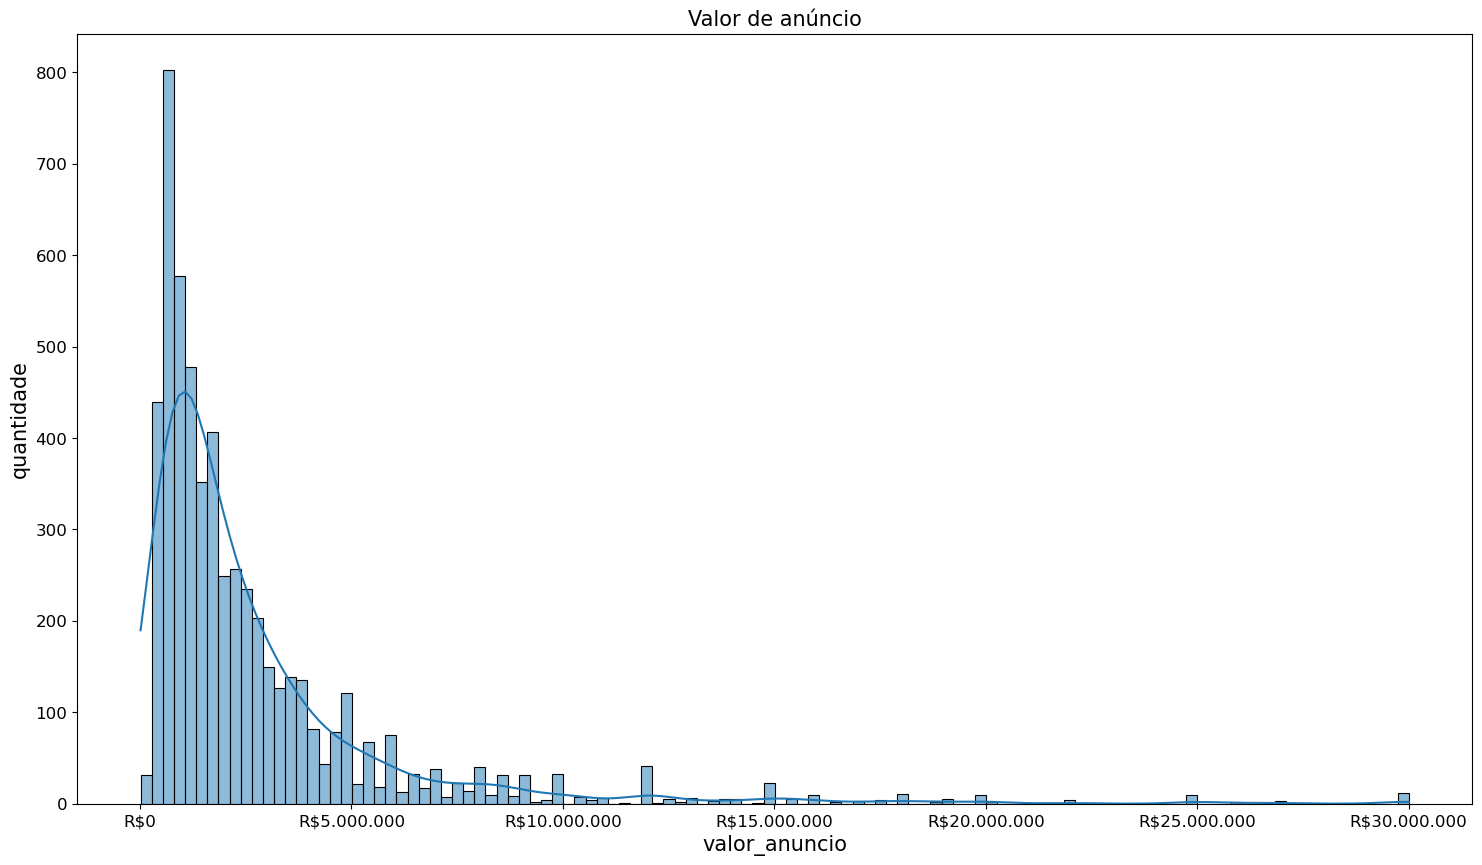

In [137]:
def formatar_milhares(valor, _):
    return 'R${:,.0f}'.format(valor).replace(',', '.')

plt.figure(figsize=(18,10))
ax = sns.histplot(x=df4['valor_anuncio'], kde=True)
data_load(ax,'Valor de anúncio', 'valor_anuncio','quantidade' )

plt.subplots_adjust(hspace=0.3)  

ax.ticklabel_format(style='plain', axis='x')


ax.xaxis.set_major_formatter(FuncFormatter(formatar_milhares))
plt.rcParams.update({'font.size': 8})
  
    
plt.show()

### 6.1.2 Variável Numérica

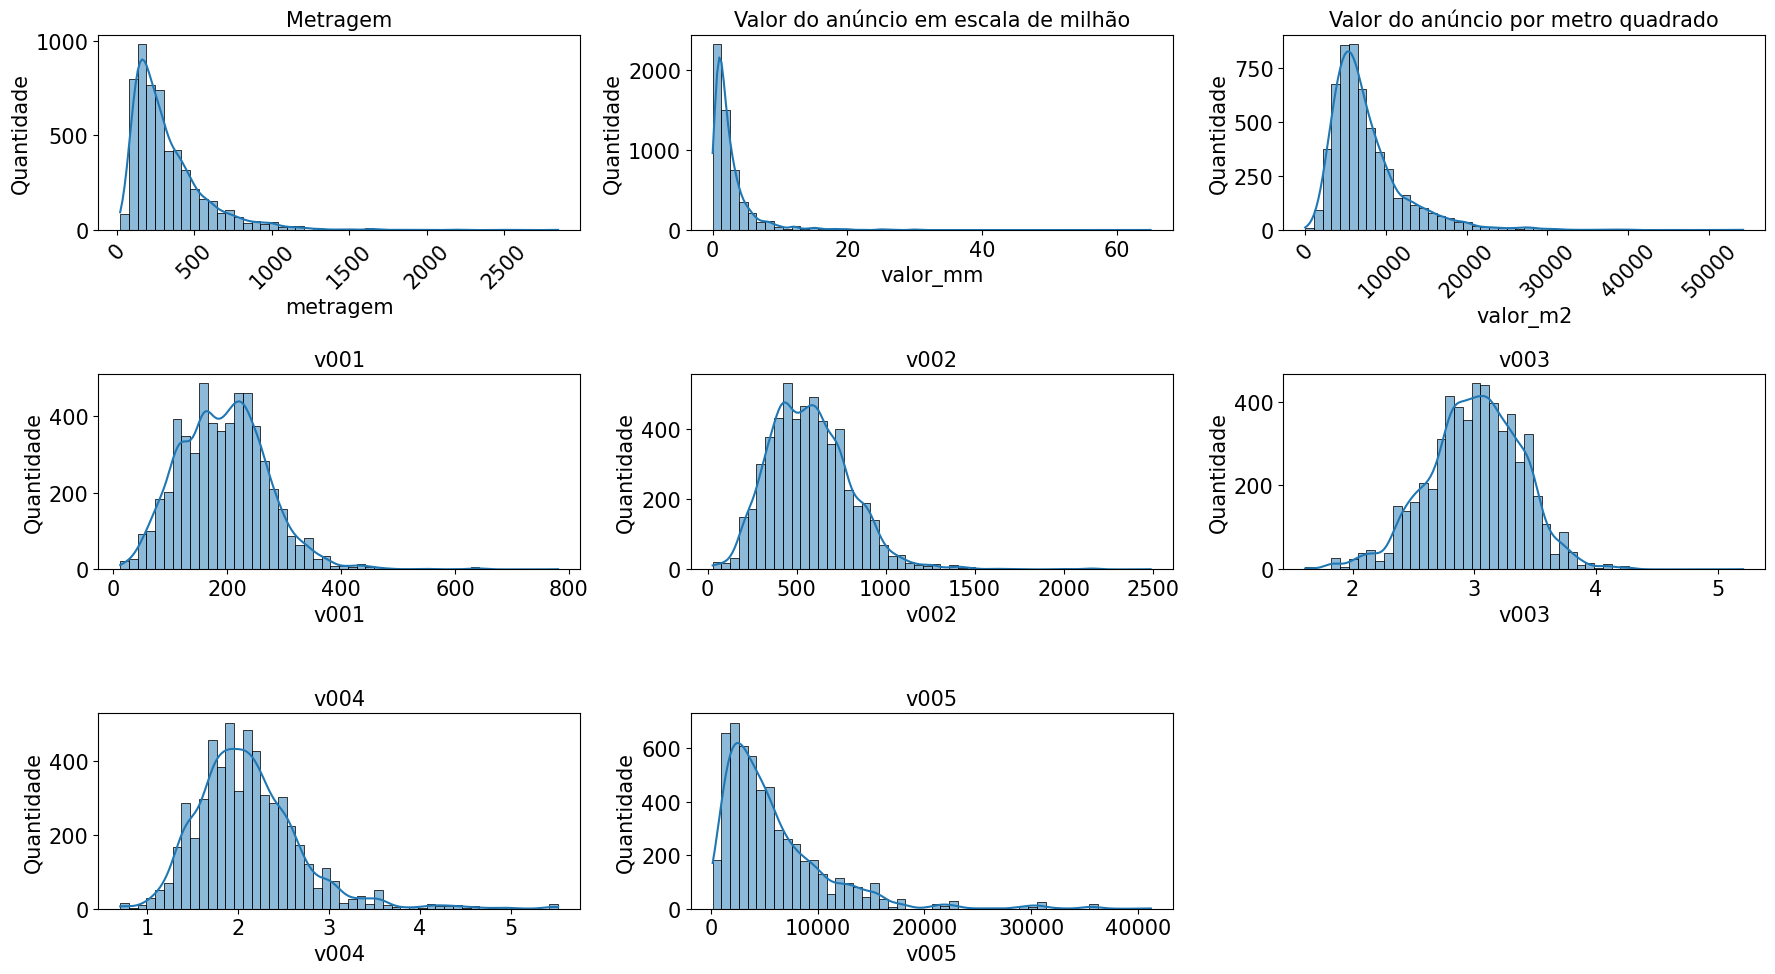

In [45]:
plt.figure(figsize=(18,10))

# Metragem
plt.subplot(3,3,1)
ax1 = sns.histplot(x=df4['metragem'],bins=50, kde=True)
data_load(ax1,'Metragem', 'metragem','Quantidade' )

# Valor do anúncio em escala de milhão
plt.subplot(3,3,2)
ax2 = sns.histplot(x=df4['valor_mm'],bins=50, kde=True)
data_load(ax2,'Valor do anúncio em escala de milhão', 'valor_mm','Quantidade' )

# Valor do anúncio por metro quadrado
plt.subplot(3,3,3)
ax3 = sns.histplot(x=df4['valor_m2'],bins=50, kde=True)
data_load(ax3,'Valor do anúncio por metro quadrado', 'valor_m2','Quantidade' )

# V001
plt.subplot(3,3,4)
ax4 = sns.histplot(x=df4['v001'],bins=50, kde=True)
data_load(ax4,'v001', 'v001','Quantidade' )

# V002
plt.subplot(3,3,5)
ax5 = sns.histplot(x=df4['v002'],bins=50, kde=True)
data_load(ax5,'v002', 'v002','Quantidade' )

# V003
plt.subplot(3,3,6)
ax6 = sns.histplot(x=df4['v003'],bins=50, kde=True)
data_load(ax6,'v003', 'v003','Quantidade' )

# V004
plt.subplot(3,3,7)
ax7 = sns.histplot(x=df4['v004'],bins=50, kde=True)
data_load(ax7,'v004', 'v004','Quantidade' )

# V005
plt.subplot(3,3,8)
ax8 = sns.histplot(x=df4['v005'],bins=50, kde=True)
data_load(ax8,'v005', 'v005','Quantidade' )


plt.subplots_adjust(hspace=0.3)  

ax1.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.rcParams.update({'font.size': 15})
    
plt.show()

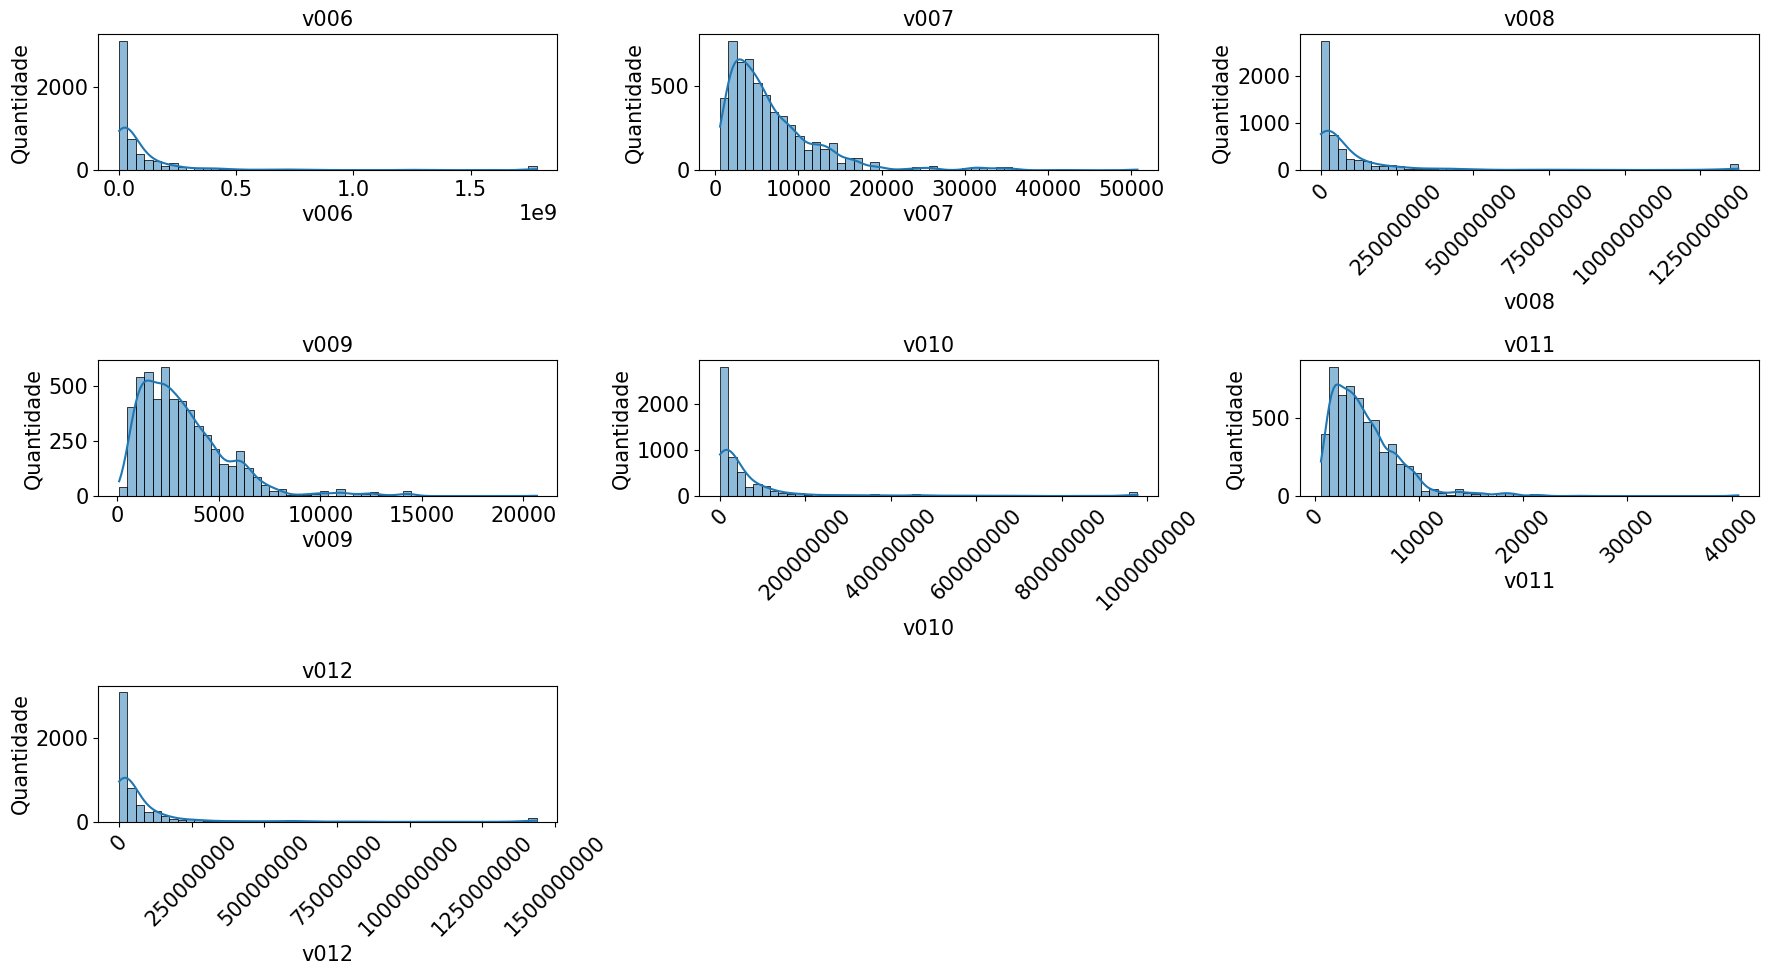

In [398]:
plt.figure(figsize=(18,10))

# V006
plt.subplot(3,3,1)
ax1 = sns.histplot(x=df4['v006'],bins=50, kde=True)
data_load(ax1,'v006', 'v006','Quantidade' )

# V007
plt.subplot(3,3,2)
ax2 = sns.histplot(x=df4['v007'],bins=50, kde=True)
data_load(ax2,'v007', 'v007','Quantidade' )

# V008
plt.subplot(3,3,3)
ax3 = sns.histplot(x=df4['v008'],bins=50, kde=True)
data_load(ax3,'v008', 'v008','Quantidade' )

# V009
plt.subplot(3,3,4)
ax4 = sns.histplot(x=df4['v009'],bins=50, kde=True)
data_load(ax4,'v009', 'v009','Quantidade' )

# V010
plt.subplot(3,3,5)
ax5 = sns.histplot(x=df4['v010'],bins=50, kde=True)
data_load(ax5,'v010', 'v010','Quantidade' )

# V011
plt.subplot(3,3,6)
ax6 = sns.histplot(x=df4['v011'],bins=50, kde=True)
data_load(ax6,'v011', 'v011','Quantidade' )

# V012
plt.subplot(3,3,7)
ax7 = sns.histplot(x=df4['v012'],bins=50, kde=True)
data_load(ax7,'v012', 'v012','Quantidade' )

ax3.ticklabel_format(style='plain', axis='x')
ax4.ticklabel_format(style='plain', axis='x')
ax5.ticklabel_format(style='plain', axis='x')
ax6.ticklabel_format(style='plain', axis='x')
ax7.ticklabel_format(style='plain', axis='x')

ax3.tick_params(axis='x', rotation=45)
ax5.tick_params(axis='x', rotation=45)
ax6.tick_params(axis='x', rotation=45)
ax7.tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=0.3)  

plt.tight_layout()

plt.rcParams.update({'font.size': 15})
    
plt.show()

### 6.1.3 Variável Categórica

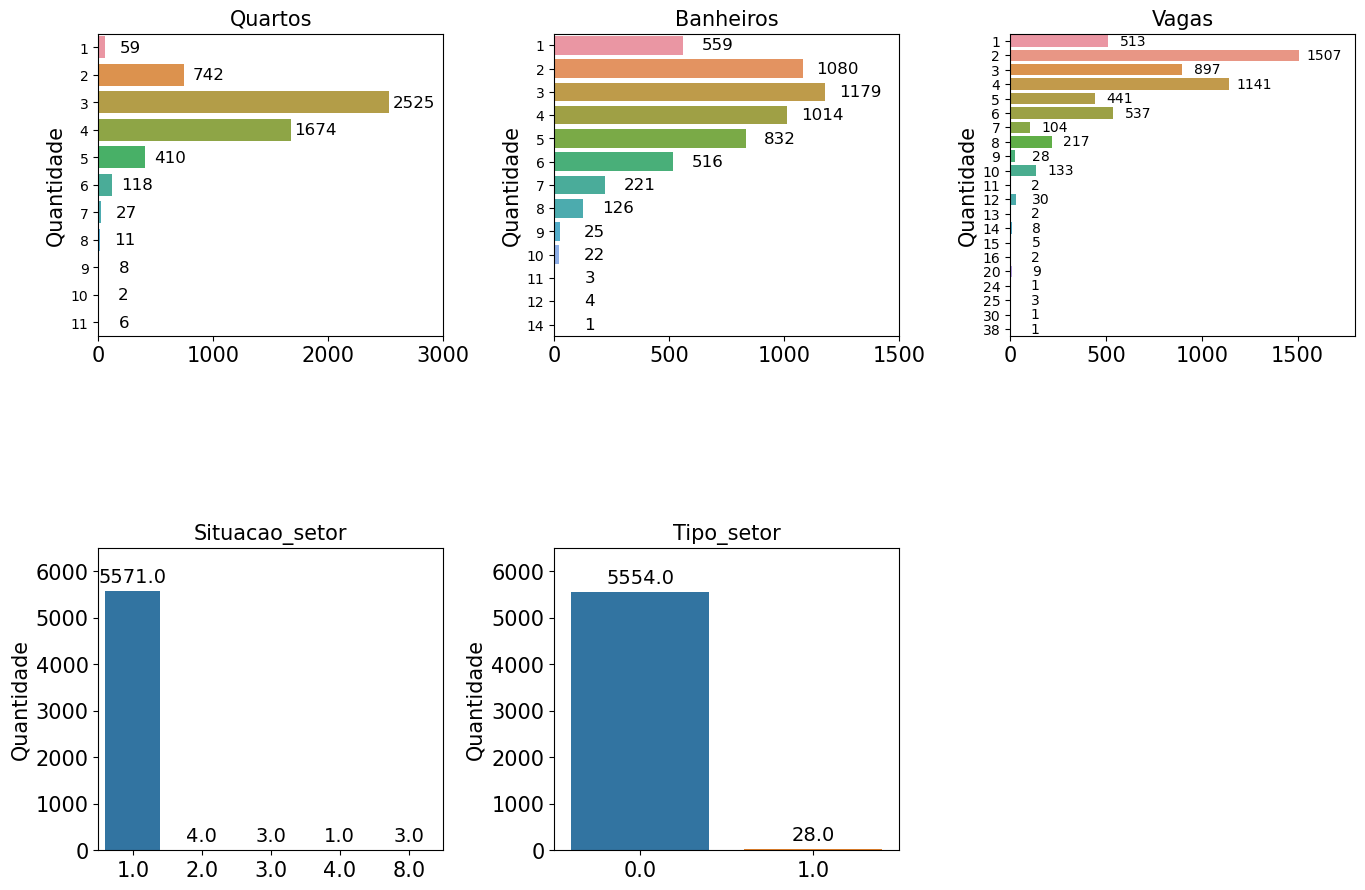

In [107]:
plt.figure(figsize=(14, 14))

def format_y_axis_ticks(ax):
    for tick in ax.get_yticklabels():
        tick.set_fontsize(10)  
def add_bar_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=14, color='black', xytext=(0, 10),
                    textcoords='offset points')
# Quartos
plt.subplot(3,3,1)
ax1 = sns.countplot(y=df4["quartos"])
data_load(ax1,'Quartos', '','Quantidade' )

# Banheiros
plt.subplot(3,3,2)
ax2 = sns.countplot(y=df4["banheiros"])
data_load(ax2,'Banheiros', '','Quantidade' )

# Vagas
plt.subplot(3,3,3)
ax3 = sns.countplot(y=df4["vagas"])
data_load(ax3,'Vagas', '','Quantidade' )

# Situacao_setor
plt.subplot(3,3,4)
ax4 = sns.countplot(x=df4["situacao_setor"])
data_load(ax4,'Situacao_setor', '','Quantidade' )

# Tipo_setor
plt.subplot(3,3,5)
ax5 = sns.countplot(x=df4["tipo_setor"])
data_load(ax5,'Tipo_setor', '','Quantidade' )

plt.tight_layout()

plt.subplots_adjust(hspace=0.7)

plt.rcParams.update({'font.size': 15})


format_y_axis_ticks(ax1)
format_y_axis_ticks(ax2)
format_y_axis_ticks(ax3)
add_bar_labels(ax4)
add_bar_labels(ax5)

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=12, color='black', xytext=(18, 0),
                textcoords='offset points')
ax1.set_xlim([0, 3000])  

for p in ax2.patches:
    ax2.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=12, color='black', xytext=(25, 0),
                textcoords='offset points')
ax2.set_xlim([0, 1500]) 

for p in ax3.patches:
    ax3.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=10, color='black', xytext=(18, 0),
                textcoords='offset points')
ax3.set_xlim([0, 1800])  

ax4.set_ylim([0, 6500])  
ax5.set_ylim([0, 6500])  

  
plt.show()    

## 6.2 Análises Bivariadas

# HIPÓTESE 1

Os 10 bairros com mais imóveis em São Paulo, seguem a mesma ordem nos somatório dos preços dos imóveis. - **FALSO**

* Observamos que há uns maiores que os outros como **Brooklin Paulista** que é o 2º com mais imóveis atrás nos somatórios de preços de **Cidade Jardim** que é o 3º com mais imóveis. **Indicamos que o bairro de Brooklin Paulista pode ser uma opção mais fácil de compra de imóvel por ser o 2º bairro com mais imóveis em São Paulo e os preços mais baixos(somatório)**.

In [108]:
H1 = df4.copy()
h1 = pd.CategoricalDtype(categories=['Alto de Pinheiros', 'Jardim Guedala', 'Brooklin Paulista',
                                     'Vila Mariana', 'Planalto Paulista', 'Pacaembu',
                                     'Jardim Paulista', 'Vila Madalena', 'Campo Belo',
                                     'Sumaré'], ordered=True)
H1['bairro'] = H1['bairro'].astype(h1)

# 10 bairros com mais imóveis em São Paulo
top_bairros = H1["bairro"].value_counts()[:10].index
top_bairros

# Somatório dos dados de cada bairro
dados_bairro = H1[['bairro','valor_anuncio']].groupby("bairro").sum()
dados_bairro.reset_index(inplace = True)
dados_bairro

# Somatório dos dados dos 10 bairros com mais imóveis em São Paulo
dados_bairro.query("bairro in @top_bairros")

,bairro,valor_anuncio
0,Alto de Pinheiros,989028210.0
1,Jardim Guedala,913829396.0
2,Brooklin Paulista,302313789.0
3,Vila Mariana,254615000.0
4,Planalto Paulista,286310000.0
5,Pacaembu,598829500.0
6,Jardim Paulista,894999000.0
7,Vila Madalena,331984000.0
8,Campo Belo,190866980.0
9,Sumaré,262900000.0


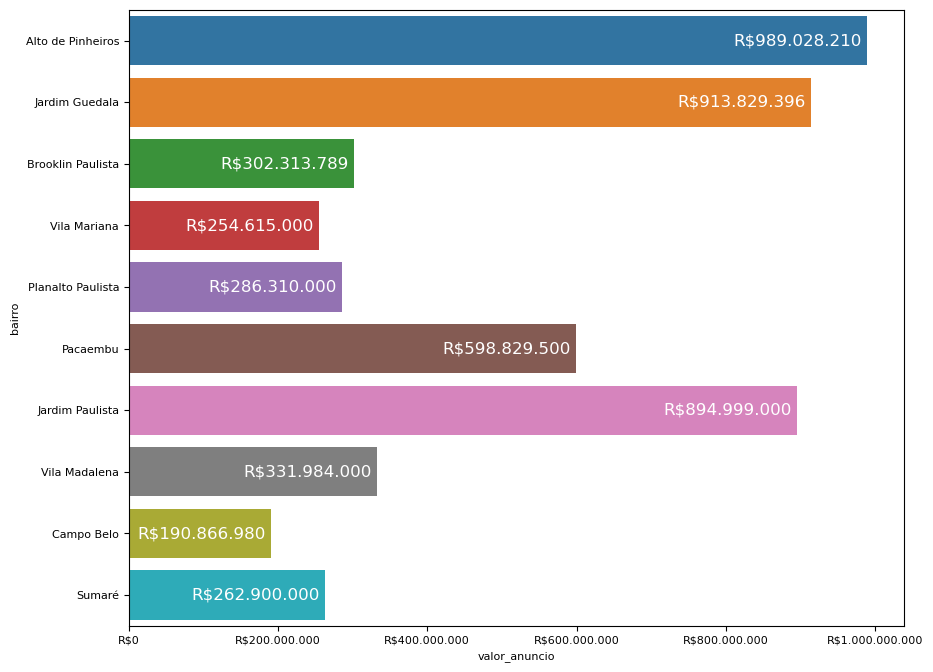

In [132]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="valor_anuncio", y="bairro", data=dados_bairro.query("bairro in @top_bairros"))

def formatar_milhares(valor, _):
    return 'R${:,.0f}'.format(valor).replace(',', '.')

ax.xaxis.set_major_formatter(FuncFormatter(formatar_milhares))
plt.rcParams.update({'font.size': 8})

for p in ax.patches:
    valor_barra = p.get_width()
    ax.annotate(formatar_milhares(valor_barra, None), 
                (valor_barra, p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=12, color='w', xytext=(-50, 0),
                textcoords='offset points')

plt.show()  

# HIPÓTESE 2

Os 10 bairros com mais imóveis em São Paulo seguem a mesma ordem no número de vagas e quartos nos imóveis de acordo com suas metragens. - **VERDADEIRO**

* Observamos que todos os 10 bairros possuem similaridade quanto a ordem de vagas, quartos e metragens.

In [133]:
df4.query("bairro in @top_bairros")

,bairro,metragem,quartos,banheiros,vagas,valor_anuncio,valor_mm,valor_m2,rua,cep,...,v009,v010,v011,v012,sub_regiões,setor,sub_setor,divisao_sub_setor,quant_dom_part,quant_mor
0,Planalto Paulista,1000,4,8,6,7000000.0,7.000,7000.000000,Avenida Itacira,4061000.0,...,2096.190000,1.302985e+07,3930.350000,1.724158e+07,4,0,6,1,Médio 1 domicílio,Médio 2 morador
21,Vila Madalena,170,2,2,1,1485000.0,1.485,8735.294118,Rua Aldo de Azevedo,5453030.0,...,3670.990000,9.165909e+07,6182.710000,1.389750e+08,5,4,5,3,Médio 2 domicílio,Muito morador
36,Vila Madalena,401,5,9,4,3890000.0,3.890,9700.748130,Rua Gregório Paes de Almeida,5450000.0,...,5832.730000,1.009635e+08,7999.640000,1.211943e+08,5,4,5,0,Médio 1 domicílio,Médio 2 morador
47,Brooklin Paulista,180,3,3,3,1100000.0,1.100,6111.111111,Rua Kansas,4558000.0,...,2550.520000,1.351649e+07,3230.030000,1.492530e+07,4,5,5,8,Médio 2 domicílio,Muito morador
62,Jardim Paulista,420,4,6,3,8700000.0,8.700,20714.285714,Rua General Fonseca Teles,1433020.0,...,7373.450000,8.358514e+08,12484.010000,1.353166e+09,1,4,3,3,Médio 1 domicílio,Médio 2 morador
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590,Brooklin Paulista,170,3,3,2,1250000.0,1.250,7352.941176,Rua Princesa Isabel,3925110.0,...,554.780000,3.512603e+05,865.040000,2.791813e+05,3,9,2,5,Médio 2 domicílio,Muito morador
5591,Pacaembu,285,3,4,5,2450000.0,2.450,8596.491228,Rua Bragança,1236020.0,...,2087.500000,6.877776e+06,2616.910000,7.237367e+06,1,2,3,6,Médio 2 domicílio,Muito morador
5594,Jardim Guedala,655,5,6,4,5000000.0,5.000,7633.587786,Rua Circular do Bosque,5604010.0,...,10849.430000,5.467751e+08,16124.840000,7.292470e+08,5,6,0,4,Pouco domicílio,Pouco morador
5598,Pacaembu,439,2,3,2,5200000.0,5.200,11845.102506,Rua Bauru,1248000.0,...,4479.225403,1.558753e+08,5994.680323,1.960144e+08,1,2,4,8,Médio 1 domicílio,Médio 2 morador


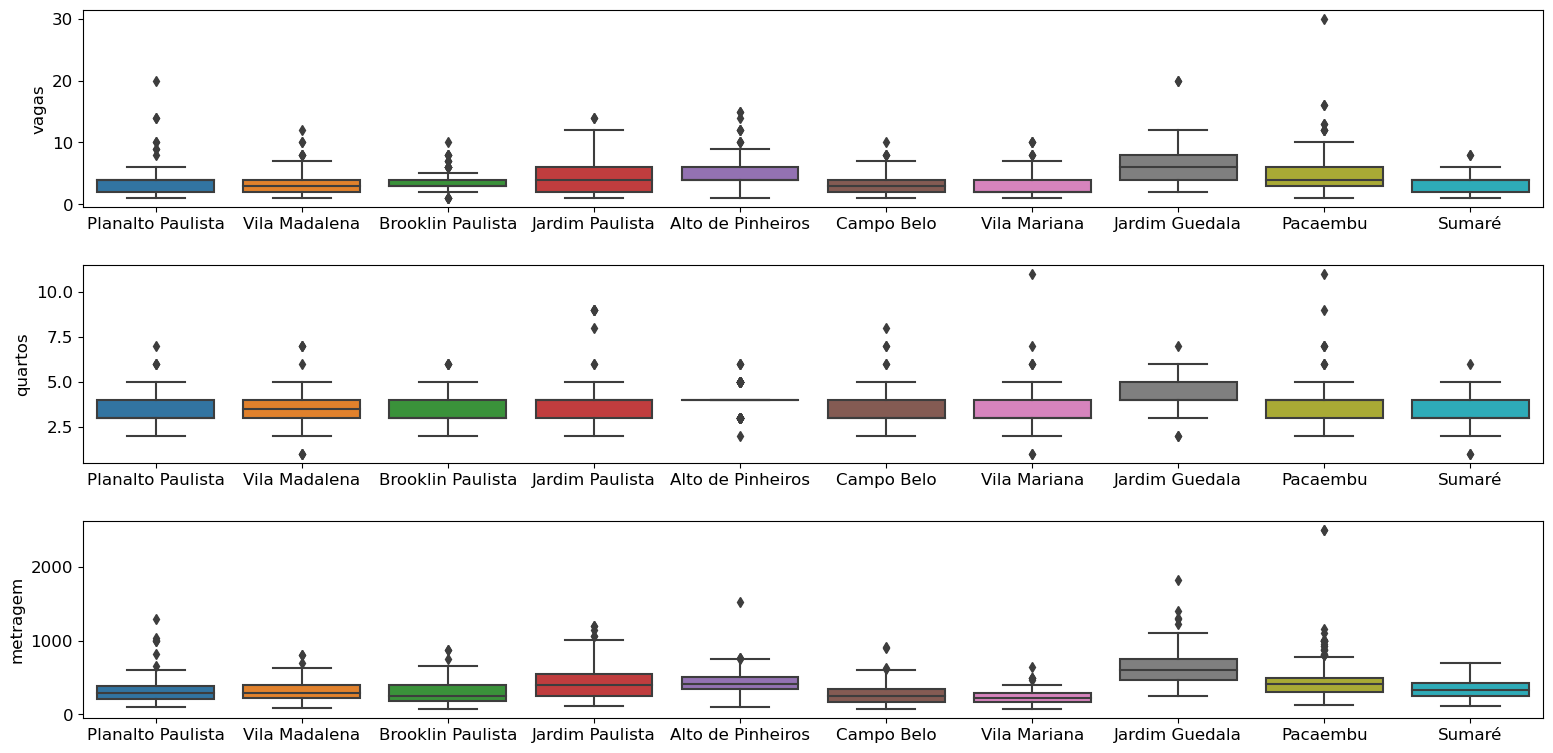

In [135]:
# Valor_m2 abaixo de 30000 devido aos valores discrepantes

foo = df4.copy()
foo['vagas'] = foo['vagas'].astype('int')

foo1 = df4.copy()
foo1['quartos'] = foo1['quartos'].astype('int')

plt.figure(figsize=(16, 8), tight_layout={'pad':2.0})

plt.subplot(3,1,1)
ax1 = sns.boxplot(data = foo.query("bairro in @top_bairros"), x="bairro", y="vagas")
plt.xlabel("")

plt.subplot(3,1,2)
ax2 = sns.boxplot(data = foo1.query("bairro in @top_bairros"), x="bairro", y="quartos")
plt.xlabel("")

plt.subplot(3,1,3)
ax3 = sns.boxplot(data = df4.query("bairro in @top_bairros"), x="bairro", y="metragem")
plt.xlabel("")

plt.rcParams.update({'font.size': 12})

plt.show()

# HIPÓTESE 3
Os 10 bairros com mais imóveis em São Paulo seguem a mesma ordem na faixa das metragens e preços/m² dos imóveis. - **FALSO**

* Observamos que há faixas de metragens maiores ou menores que outros e não seguem a mesma ordem da quantidade de imóveis por bairro. **Cidade Jardim** e **Jardim Guedala**  são os que possuem as faixas de maiores metragens. **Para pessoas que procuram conforto em relação ao tamanho do imóvel, procurem nos bairros Cidade Jardim ou Jardim Guedala que é onde possuem faixa de preços similares aos outros e metragens maiores**.

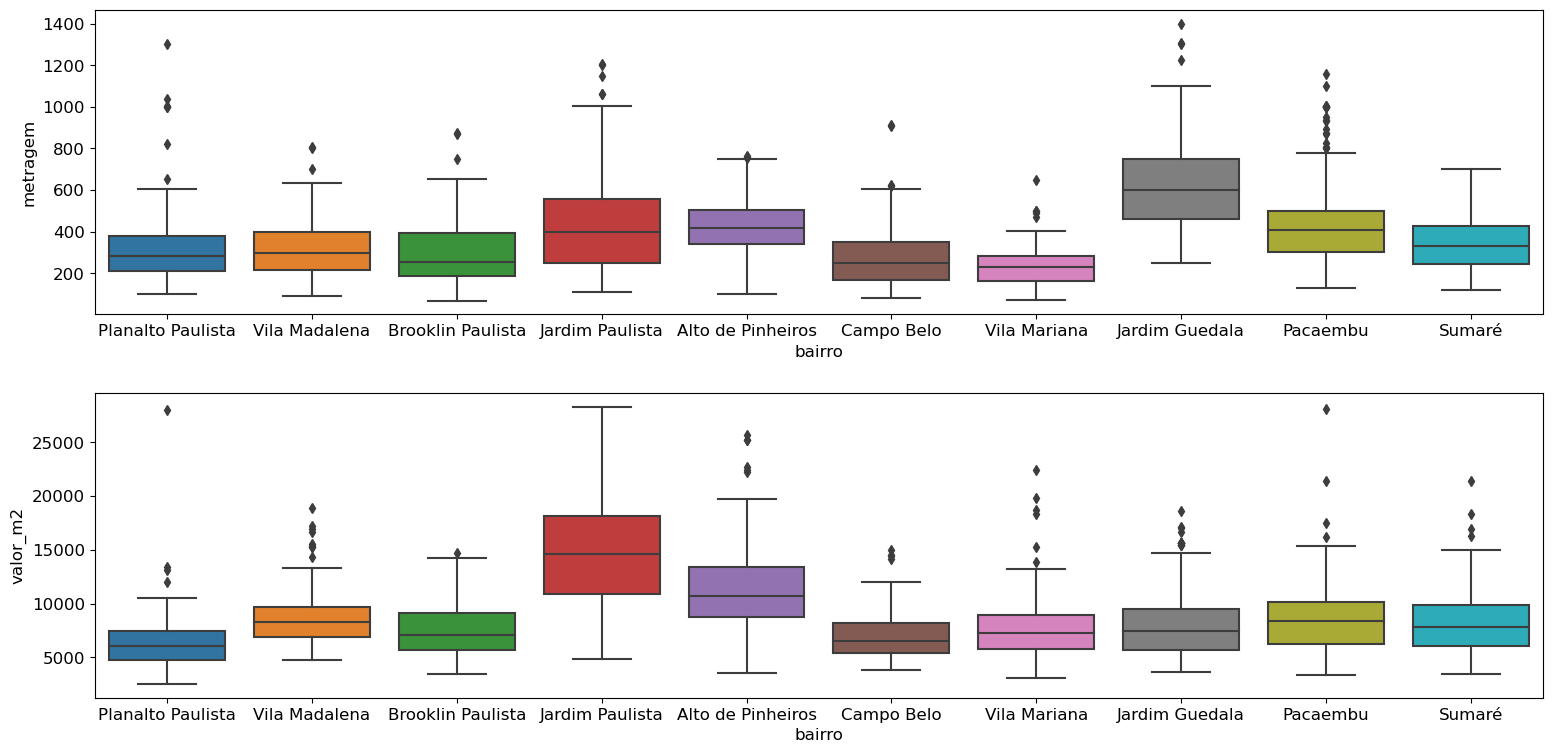

In [136]:
# Metragem abaixo de 1500 devido aos valores discrepantes
plt.figure(figsize=(16, 8), tight_layout={'pad':2.0})

plt.subplot(2,1,1)
ax = sns.boxplot(data = df4.query("bairro in @top_bairros  & metragem < 1500"), x="bairro", y="metragem")

plt.subplot(2,1,2)
a1 = sns.boxplot(data = df4.query("bairro in @top_bairros & valor_m2 < 30000"), x="bairro", y="valor_m2")

plt.rcParams.update({'font.size': 12})

plt.show()

# HIPÓTESE 4
Os valores das médias apenas de pessoas com rendimento nominal médio mensal é diretamente proporcional ao valor do m² dos imóveis. - **Falso**

* A maioria dos imóveis possuem valor do m2 abaixo dos 20000 reais e estão localizados em áreas onde as médias de pessoas com rendimento nominal mensal é abaixo dos 20000 reais, ou seja, baixo também.A partir do momento que o valor do m2 sobe acima dos 20000 reais, a renda nominal média continua baixo, e a partir do momento que a renda nominal média fica acima dos 20000 reais, o valor do m2 continua baixo também , mostrado também na correlação que é menor que 0.5 e tudo isso, talvez por causa da aŕea localizada ou por opção das pessoas mesmo. **Pessoas com rendas mais baixas não precisam adquirir imóveis com valores muito altos como observamos no gráfico em algumas situações. Existem vários imóveis com valores/m2 abaixo dos 20000 reais e com atributos(metragem,quartos,banheiros e vagas) não tão diferentes dos imóveis de valores acima de 20000/m2**.

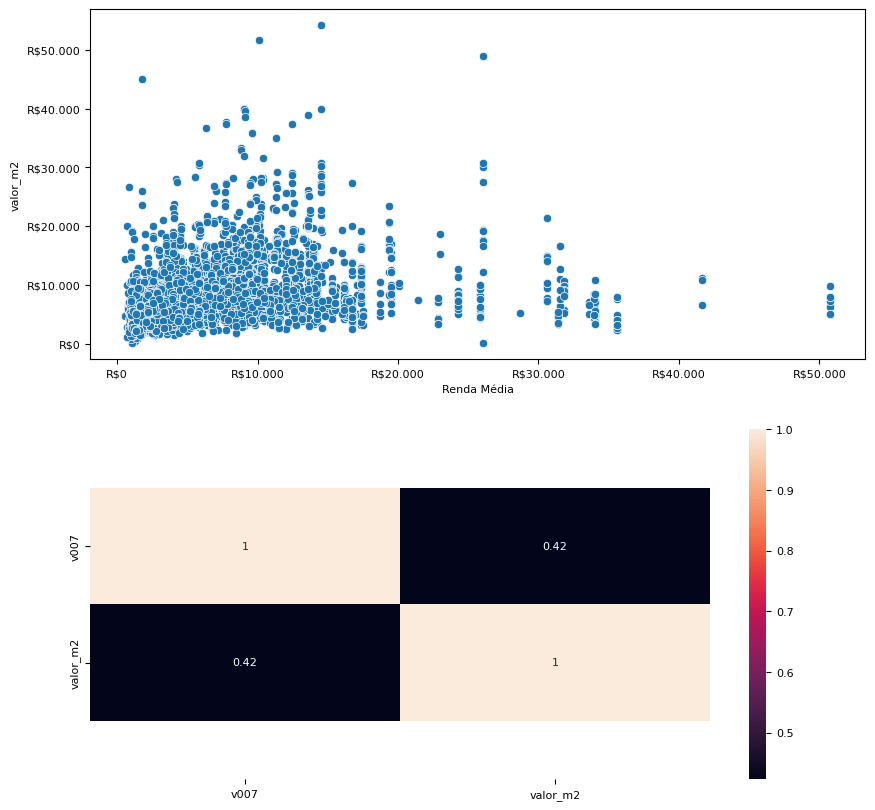

In [139]:
def formatar_milhares(valor, _):
    return 'R${:,.0f}'.format(valor).replace(',', '.')

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
ax1 = sns.scatterplot(data = df4, x="v007", y="valor_m2")
plt.xlabel('Renda Média')

ax1.xaxis.set_major_formatter(FuncFormatter(formatar_milhares))
plt.rcParams.update({'font.size': 8})
ax1.yaxis.set_major_formatter(FuncFormatter(formatar_milhares))
plt.rcParams.update({'font.size': 8})

aux = df4[['valor_m2', 'v007']].groupby('v007').sum().reset_index()

plt.subplot(2, 1, 2)
ax2 = sns.heatmap(aux.corr(method='pearson'), annot=True)
bottom, top = ax2.get_ylim()
ax2.set_ylim(bottom+0.5, top-0.5);

plt.show()

In [411]:
hp4 = df4.copy()
hp4[['quartos','banheiros','vagas']] = hp4[['quartos','banheiros','vagas']].astype(int)
hp4[['metragem','quartos','banheiros','vagas']][(hp4['valor_m2'] > 20000) & (hp4['v007'] < 20000)].describe()

,metragem,quartos,banheiros,vagas
count,128.000000,128.000000,128.000000,128.000000
mean,535.203125,3.632812,4.898438,5.757812
std,322.762860,1.078575,1.983554,3.989644
min,20.000000,1.000000,1.000000,1.000000
25%,248.000000,3.000000,3.000000,3.750000
50%,527.500000,4.000000,5.000000,5.000000
75%,707.750000,4.000000,6.000000,7.000000
max,1816.000000,6.000000,10.000000,25.000000


In [412]:
hp4[['metragem','quartos','banheiros','vagas']][(hp4['valor_m2'] < 20000) & (hp4['v007'] < 20000)].describe()

,metragem,quartos,banheiros,vagas
count,5281.000000,5281.000000,5281.000000,5281.000000
mean,308.362431,3.373225,3.617875,3.684529
std,224.650262,1.020748,1.801035,2.345710
min,29.000000,1.000000,1.000000,1.000000
25%,156.000000,3.000000,2.000000,2.000000
50%,250.000000,3.000000,3.000000,3.000000
75%,397.000000,4.000000,5.000000,5.000000
max,2850.000000,11.000000,14.000000,38.000000


### 6.2.1 Visão Global das Hipóteses

In [413]:
tab =[['Hypothesis', 'Conclusion', 'Relevance', 'Discover'],
      ['H1', 'Falso', 'Os 10 bairros com mais imóveis em São Paulo, seguem a mesma ordem nos somatório dos preços dos imóveis.'],  
      ['H2', 'Verdadeiro', 'Médio', 'Os 10 bairros com mais imóveis em São Paulo seguem a mesma ordem no número de vagas e quartos nos imóveis de acordo com suas metragens.'],  
      ['H3', 'Falso', 'Alto', 'Os 10 bairros com mais imóveis em São Paulo seguem a mesma ordem na faixa das metragens e preços/m² dos imóveis.'],
      ['H4', 'Falso', 'Alto', 'Os valores das médias apenas de pessoas com rendimento nominal médio mensal é diretamente proporcional ao valor do m² dos imóveis.'],
     ]

print( tabulate( tab, headers='firstrow' ) )

Hypothesis    Conclusion    Relevance                                                                                                Discover
------------  ------------  -------------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------------
H1            Falso         Os 10 bairros com mais imóveis em São Paulo, seguem a mesma ordem nos somatório dos preços dos imóveis.
H2            Verdadeiro    Médio                                                                                                    Os 10 bairros com mais imóveis em São Paulo seguem a mesma ordem no número de vagas e quartos nos imóveis de acordo com suas metragens.
H3            Falso         Alto                                                                                                     Os 10 bairros com mais imóveis em São Paulo seguem a me

## 6.3 Análises Multivariadas

* Vamos dividir os atributos em categóricos, numérico e binários para fazer correlações entre eles.

* As variáveis consideradas categóricas alteramos os dtypes para 'category' com o bjetivo de fazer as correlações.

* Algumas variáveis serão excluídas, pois não terão mais utilidades.

### 6.3.1 Dtypes

Dados Numéricos:

* <code>metragem<code>
* <code>valor_anuncio<code> 
* <code>valor_mm<code>
* <code>valor_m2<code>  
* <code>v001<code> 
* <code>v002<code>
* <code>v003<code>     
* <code>v004<code>     
* <code>v005<code>     
* <code>v006<code> 
* <code>v007<code>     
* <code>v008<code>     
* <code>v009<code>     
* <code>v010<code>
* <code>v011<code>
* <code>v012<code>
    
Dados Categóricos:

* <code>bairro<code>     
* <code>quartos<code>     
* <code>banheiros<code>     
* <code>vagas<code>
* <code>rua<code>
* <code>cep<code>
* <code>setor_censo<code>     
* <code>nome_do_distrito<code>     
* <code>sub_regiões<code>     
* <code>setor<code>
* <code>sub_setor<code>
* <code>divisao_sub_setor<code>  
* <code>quant_dom_part<code> 
* <code>quant_mor<code>     
    
Dados Binários:

* <code>situacao_setor<code> 
* <code>tipo_setor<code> 

In [414]:
df5 = df4.copy()

In [415]:
df5.reset_index(drop=True, inplace=True)

In [416]:
# Dividindo os dados em binary, numerical e categorical
categorical = df5[['bairro','quartos','banheiros','vagas','rua','cep','setor_censo','nome_do_distrito','sub_regiões','setor','sub_setor','divisao_sub_setor','quant_dom_part','quant_mor']]
numerical = df5[['metragem','valor_anuncio','valor_mm','valor_m2','v001','v002','v003','v004','v005','v006','v007','v008','v009','v010','v011','v012']]
binary = df5[['situacao_setor','tipo_setor']]

### 6.3.2 Atributos Numéricos

Nos atributos numéricos, observamos boas correlações entre as variáveis, principalmente com a variável alvo(valor_anuncio). A melhor relação foi entre metragem quadrada do imóvel(Valor_m2) e variável alvo com **0.72**.

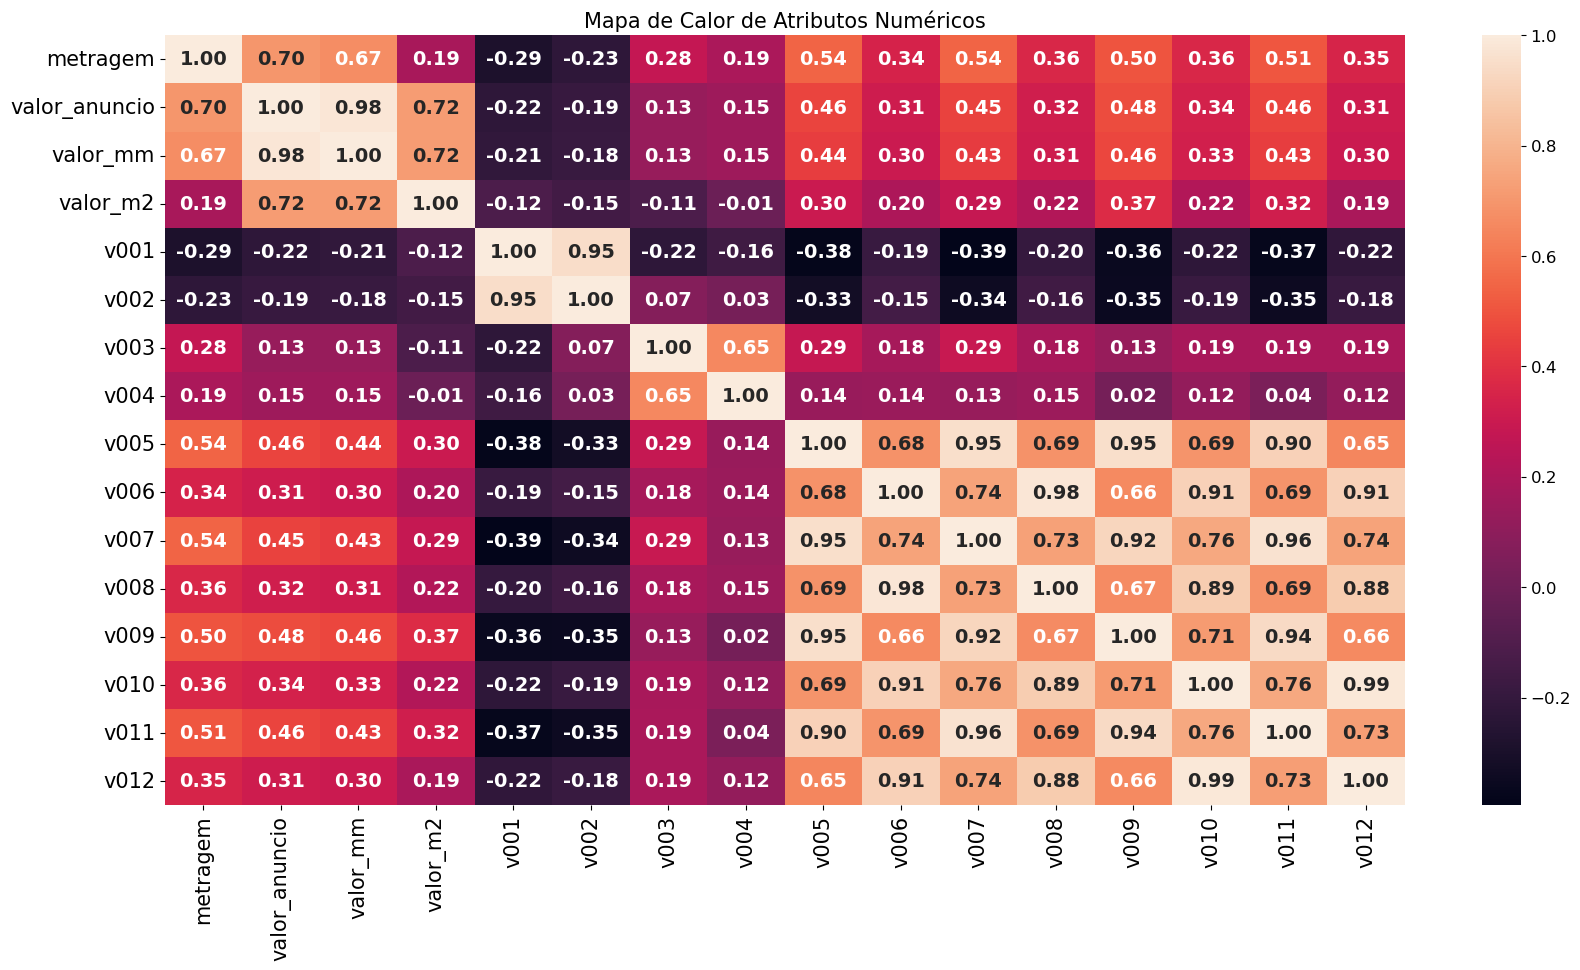

In [417]:
# Correlação entre dados int e float
NIF = numerical.select_dtypes(['int64','int32', 'float64'])
atributos_num = NIF.corr( method='pearson' )
plt.figure( figsize=(20, 10) )
ax1 = sns.heatmap(data=atributos_num, annot=True, fmt='.2f', annot_kws={'fontsize':14, 'fontweight':'bold'})
ax1.set_xticklabels(atributos_num, fontsize=15)
ax1.set_yticklabels(atributos_num, fontsize=15)
data_load(ax1, 'Mapa de Calor de Atributos Numéricos', '', '')

### 6.3.3 Atributos categóricos

In [418]:
CAT = df5.select_dtypes(['object','category'])
CAT.head(3)

,bairro,quartos,banheiros,vagas,rua,cep,setor_censo,nome_do_distrito,situacao_setor,tipo_setor,sub_regiões,setor,sub_setor,divisao_sub_setor,quant_dom_part,quant_mor
0,Planalto Paulista,4,8,6,Avenida Itacira,4061000.0,355030.877000067,SAÚDE,1.0,0.0,4,0,6,1,Médio 1 domicílio,Médio 2 morador
1,Jardim dos Estados,4,4,4,Rua Aurelia Perez Alvarez,4642020.0,355030.871000023,SANTO AMARO,1.0,0.0,4,6,4,2,Médio 1 domicílio,Médio 2 morador
2,Jardim Reimberg,4,3,2,Rua Alba Valdez,4845200.0,355030.83000005,GRAJAÚ,1.0,0.0,4,8,4,5,Médio 1 domicílio,Médio 2 morador


In [419]:
list = df5.select_dtypes(['object','category']).columns.tolist()
CCAT=[]
for a in list:
    for b in list:
        CCAT = np.append(CCAT,cramer_v(CAT[a], CAT[b]))

c = pd.DataFrame({'bairro': CCAT[0:16],
                'quartos': CCAT[16:32],
                'banheiros': CCAT[32:48],
                'vagas': CCAT[48:64],
                'rua': CCAT[64:80],
                'cep': CCAT[80:96],
                'setor_censo': CCAT[96:112],
                'nome_do_distrito': CCAT[112:128],
                'situacao_setor': CCAT[128:144],
                'tipo_setor': CCAT[144:160],
                'sub_regiões': CCAT[160:176],
                'setor': CCAT[176:192],
                'sub_setor': CCAT[192:208],
                'divisao_sub_setor': CCAT[208:224],
                'quant_dom_part': CCAT[224:240],
                'quant_mor': CCAT[240:256]})
c = c.set_index(c.columns)
c

,bairro,quartos,banheiros,vagas,rua,cep,setor_censo,nome_do_distrito,situacao_setor,tipo_setor,sub_regiões,setor,sub_setor,divisao_sub_setor,quant_dom_part,quant_mor
bairro,1.056072,0.433961,0.342537,0.327820,1.046547,1.046547,1.017361,0.900810,0.694944,0.511536,0.948843,0.913533,0.780871,0.558060,0.685894,0.568782
quartos,0.433961,1.000897,0.243274,0.215546,0.835163,0.835163,0.684055,0.216030,0.020152,0.015526,0.130497,0.118495,0.058129,0.062433,0.136903,0.114892
banheiros,0.342537,0.243274,1.001077,0.194976,0.756885,0.756885,0.558912,0.192588,0.038388,0.035692,0.142785,0.127637,0.068131,0.067171,0.148745,0.116849
vagas,0.327820,0.215546,0.194976,1.001796,0.786311,0.786311,0.560310,0.165711,0.043348,0.050618,0.124521,0.130545,0.081617,0.076346,0.169261,0.130127
rua,1.046547,0.835163,0.756885,0.786311,1.330595,1.330595,1.195461,1.008054,1.000320,1.000051,1.000409,1.000768,1.000768,1.000768,0.999773,1.000230
cep,1.046547,0.835163,0.756885,0.786311,1.330595,1.330595,1.195461,1.008054,1.000320,1.000051,1.000409,1.000768,1.000768,1.000768,0.999773,1.000230
setor_censo,1.017361,0.684055,0.558912,0.560310,1.195461,1.195461,1.195610,1.004373,1.000332,1.000063,0.977384,0.976137,0.946884,0.884908,0.992203,0.988331
nome_do_distrito,0.900810,0.216030,0.192588,0.165711,1.008054,1.008054,1.004373,1.008252,0.438865,0.436657,0.864618,0.781969,0.408906,0.232578,0.466811,0.389363
situacao_setor,0.694944,0.020152,0.038388,0.043348,1.000320,1.000320,1.000332,0.438865,1.000358,0.003135,0.038727,0.110197,0.058221,0.054096,0.054539,0.060237
tipo_setor,0.511536,0.015526,0.035692,0.050618,1.000051,1.000051,1.000063,0.436657,0.003135,0.982141,0.044601,0.125004,0.081858,0.078580,0.113684,0.153585


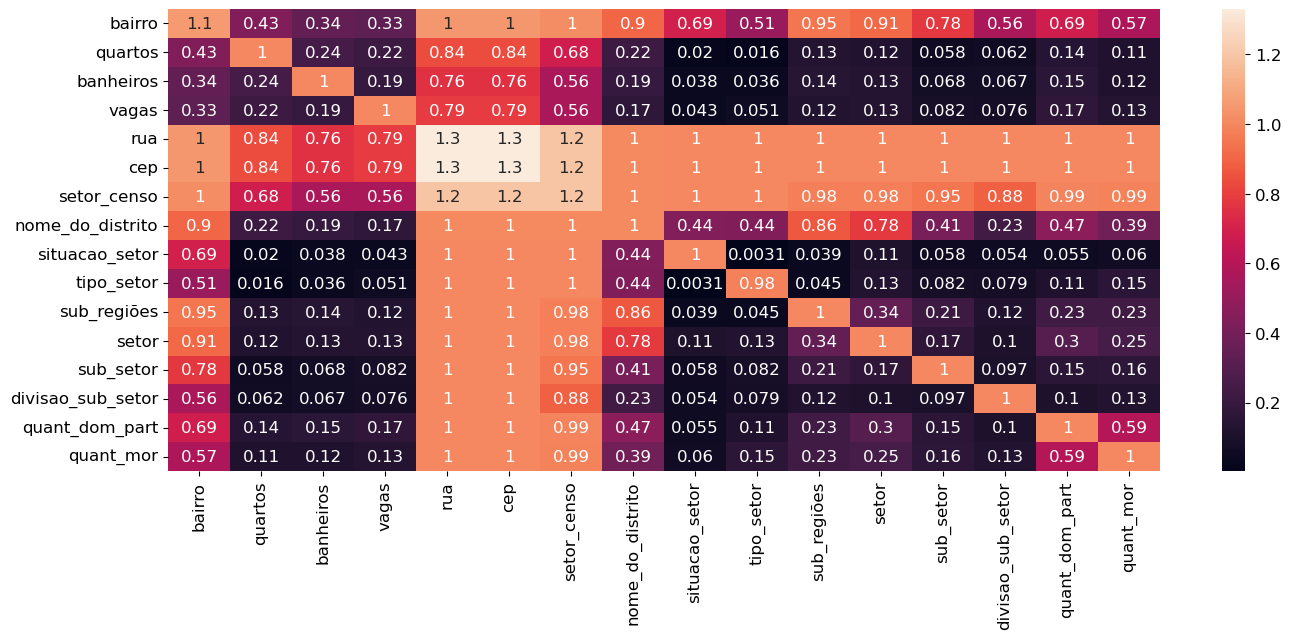

In [420]:
plt.figure(figsize=(16,6))
sns.heatmap(c, annot=True)
plt.show()

# 7.0 Preparação dos dados

## 7.1 treino e teste

In [421]:
# Dividindo em treino e teste
X = df5.drop(['valor_anuncio'], axis=1)
y = df5[['valor_anuncio']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

## 7.2 Reescalando

Nesse módulo vamos utilizar o **RobustScaler** devido à presença de alguns dados discrepantes(outliers) e essa normalização é específica para esses tipos de dados.

In [422]:
train_scale = X_train[['metragem','valor_mm','valor_m2','v001','v002','v003','v004','v005','v006','v007','v008','v009','v010','v011','v012']]
test_scale = X_test[['metragem','valor_mm','valor_m2','v001','v002','v003','v004','v005','v006','v007','v008','v009','v010','v011','v012']]

In [423]:
# Instanciando a normalização 
escala_rs = RobustScaler()

escala_rs.fit(train_scale)

train_numerical = escala_rs.transform(train_scale.values)
test_numerical = escala_rs.transform(test_scale.values)

train_numerical_scaled = pd.DataFrame(train_numerical, columns=train_scale.columns)
test_numerical_scaled = pd.DataFrame(test_numerical, columns=test_scale.columns)

In [424]:
pickle.dump(escala_rs, open('models/Robust_scaler.pkl', 'wb'))

## 7.3 Separando data types

Com o objetivo de deixar a variável alvo mais simétrica, pegamos os logaritmos dos valores devido ao formato do gráfico de frequência favorecer.

In [425]:
# Variável alvo
y_train = y_train[['valor_anuncio']]
y_train['valor_anuncio'] = np.log1p( y_train['valor_anuncio'] )

# Variável alvo
y_test = y_test[['valor_anuncio']]
y_test['valor_anuncio'] = np.log1p( y_test['valor_anuncio'] )

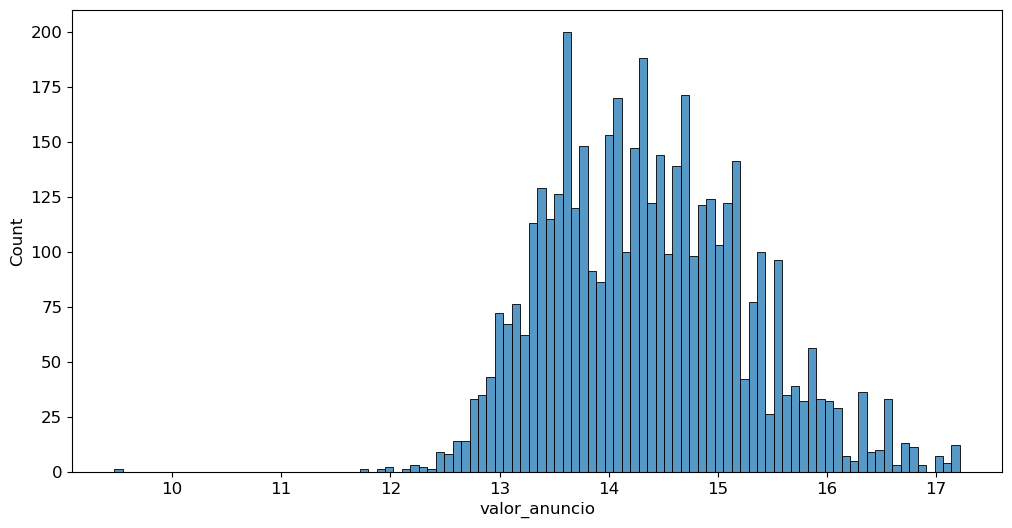

In [426]:
plt.figure(figsize=(12, 6))
ax1 = sns.histplot( y_train['valor_anuncio'], kde=False, bins=100  )

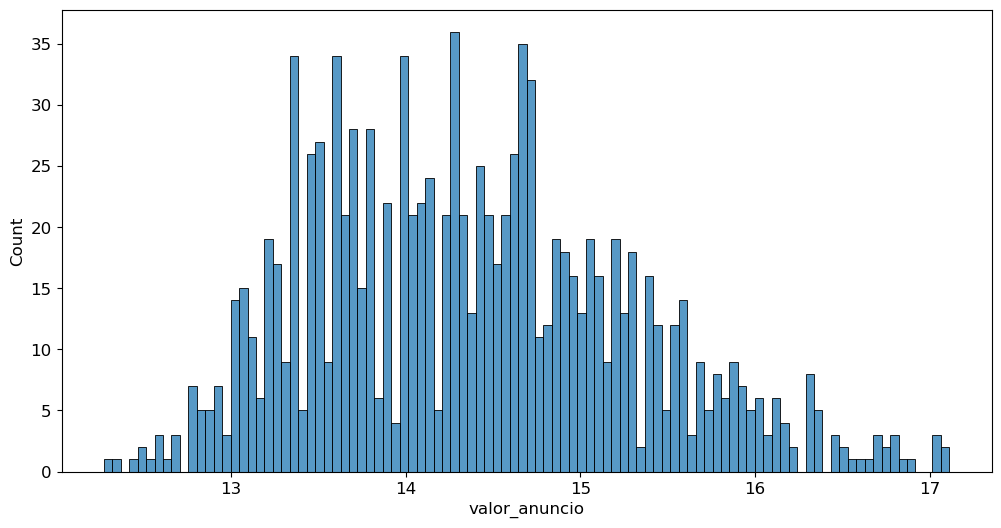

In [427]:
plt.figure(figsize=(12, 6))
ax1 = sns.histplot( y_test['valor_anuncio'], kde=False, bins=100  )

## 7.4 Transformação

In [428]:
# Selecionando as colunas binárias
train_binary = X_train[['situacao_setor','tipo_setor']]
test_binary = X_test[['situacao_setor','tipo_setor']]

# Enumerando em ordem os índices
train_binary = train_binary.reset_index(drop=True)
test_binary = test_binary.reset_index(drop=True)

## 7.5 Frequências

Calcularemos as frequências dos dados em cada variável com o objetivo de colocarmos em escalas mais próximas para a etapa de Machine Learning mais a frente.

In [429]:
# Selecionando as colunas categorical
train_cat_ = X_train[['bairro', 'quartos', 'banheiros', 'vagas', 'rua', 'cep', 'setor_censo',
       'nome_do_distrito', 'sub_regiões', 'setor', 'sub_setor',
       'divisao_sub_setor', 'quant_dom_part', 'quant_mor']]
test_cat_ = X_test[['bairro', 'quartos', 'banheiros', 'vagas', 'rua', 'cep', 'setor_censo',
       'nome_do_distrito', 'sub_regiões', 'setor', 'sub_setor',
       'divisao_sub_setor', 'quant_dom_part', 'quant_mor']]

In [430]:
# Enumerando em ordem os índices
train_cat_.reset_index(drop=True, inplace=True)
test_cat_.reset_index(drop=True, inplace=True)

In [431]:
train_cat_codificado = frequencias_codificadas(train_cat_)
test_cat_codificado = frequencias_codificadas(test_cat_)

## 7.5 Transformação das Variáveis

In [432]:
# Concatenando os dados de transformação de treino
X_train_ = pd.concat([train_numerical_scaled, train_binary,train_cat_codificado], axis=1)
X_test_ = pd.concat([test_numerical_scaled, test_binary,test_cat_codificado], axis=1)

# 8 Seleção de Recursos

## 8.1 Boruta

Devido à demora no carregamento, o modelo Boruta para seleção de features foi comentado, então analisamos as melhores correlações e, através de alguns testes, selecionamos apenas as 19 melhores colunas para aplicar nos modelos de Machine Learnig de regressão.

In [121]:
# Instanciando ExtraTreesClassifier e RandomForestClassifier
# RF_classifier = RandomForestClassifier(n_jobs=-1)
# ET_classifier = ExtraTreesClassifier(n_jobs=-1)

In [122]:
# X2 = data_conc.drop('Valor_anuncio', axis=1)
# y2 = data1[['Valor_anuncio']]

# splits nos dados de treino e teste
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=11)

In [123]:
# Definindo Boruta
# boruta = BorutaPy(ET_classifier, n_estimators='auto', verbose=2, random_s# tate=42).fit(X2_train.values, y2_train.values.ravel())

In [124]:
# Ranking das features
# cols_selected = boruta.support_.tolist()
# cols_selected_boruta =X2_train.iloc[:, cols_selected].columns.to_list()
# cols_selected_boruta

In [125]:
# Plotando o ranking das features
# ET_classifier.fit(X2_train, y2_train)

# feat_importances = pd.Series(ET_classifier.feature_importances_, index=X2_train.columns)
# feat_importances.sort_values().plot(kind='barh')

# 9 Machine Learning

Nesse modelo aplicamos os modelos de Machine Learning e o algoritmo que melhor atendeu aos resultados necessários foi o modelo **Random Forest Regressor** com boa acurácia e média de erros baixo.

## 9.1 Treinando os modelos e calculando as métricas

In [433]:
X_train_ = X_train_.astype(float)
X_test_ = X_test_.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

Divisão dos dados em treino e teste.

In [434]:
X_train_ = X_train_[['metragem', 'vagas', 'banheiros', 'bairro', 'quartos', 'v011', 'v007', 'v005', 'v009', 'nome_do_distrito',
'cep', 'rua', 'setor_censo', 'setor', 'divisao_sub_setor', 'v003', 'sub_regiões', 'v004']] 

X_test_ = X_test_[['metragem', 'vagas', 'banheiros', 'bairro', 'quartos', 'v011', 'v007', 'v005', 'v009', 'nome_do_distrito',
'cep', 'rua', 'setor_censo', 'setor', 'divisao_sub_setor', 'v003', 'sub_regiões', 'v004']] 

## 9.2 Regressão Linear

In [435]:
# Modelo
lr = LinearRegression().fit( X_train_, y_train )

# Predição
lr_pred = lr.predict( X_test_ )

Model_Name = 'Linear Regression'
mae = mean_absolute_error( y_test ,lr_pred )
mape = mean_absolute_percentage_error(y_test, lr_pred)
rmse = np.sqrt( mean_squared_error( y_test ,  lr_pred ) )
r2_test = r2_score(y_test, lr_pred)

In [436]:
 lr_df = pd.DataFrame({'Model Name': Model_Name,
                        'MAE': mae,
                        'MAPE': mape,
                        'RMSE': rmse,
             'R2_Score' : r2_test},index=[0])
lr_df

,Model Name,MAE,MAPE,RMSE,R2_Score
0,Linear Regression,0.382707,0.026327,0.539332,0.64795


In [437]:
pickle.dump(lr, open('models/LinearRegression.pkl', 'wb'))

## 9.3 Random Forest Regressor

In [438]:
# Modelo
rf = RandomForestRegressor( n_estimators=100, 
                           n_jobs=-1,         
                           random_state=11 ).fit( X_train_, y_train )

# Predição
rf_pred = rf.predict( X_test_ )

Model_Name = 'Randon Forest Regressor'
mae = mean_absolute_error( y_test ,rf_pred )
mape = mean_absolute_percentage_error(y_test, rf_pred)
rmse = np.sqrt( mean_squared_error( y_test ,  rf_pred ) )
r2_test = r2_score(y_test, rf_pred)

In [439]:
rf_df = pd.DataFrame({'Model Name': Model_Name,
                        'MAE': mae,
                        'MAPE': mape,
                        'RMSE': rmse,
             'R2_Score' : r2_test},index=[0])
rf_df

,Model Name,MAE,MAPE,RMSE,R2_Score
0,Randon Forest Regressor,0.250429,0.017386,0.335676,0.863625


In [440]:
pickle.dump(rf, open('models/RandomForestRegressor.pkl', 'wb'))

## 9.4 Lasso

In [441]:
# Modelo
lrr   = Lasso( alpha=0.01 ).fit( X_train_, y_train )

# Predição
lrr_pred = lrr.predict( X_test_ )

Model_Name = 'Lasso'
mae = mean_absolute_error( y_test ,lrr_pred )
mape = mean_absolute_percentage_error(y_test, lrr_pred)
rmse = np.sqrt( mean_squared_error( y_test ,  lrr_pred ) )
r2_test = r2_score(y_test, lrr_pred)

In [442]:
lrr_df = pd.DataFrame({'Model Name': Model_Name,
                        'MAE': mae,
                        'MAPE': mape,
                        'RMSE': rmse,
             'R2_Score' : r2_test},index=[0])
lrr_df

,Model Name,MAE,MAPE,RMSE,R2_Score
0,Lasso,0.425137,0.029247,0.594575,0.572137


In [443]:
pickle.dump(lrr, open('models/Lasso.pkl', 'wb'))

## 9.5 Performance dos modelos

In [444]:
# Criando dataframe para comparar as perfomnaces dos modelos
modelos = pd.concat([lr_df, rf_df, lrr_df])
modelos.sort_values('RMSE')

,Model Name,MAE,MAPE,RMSE,R2_Score
0,Randon Forest Regressor,0.250429,0.017386,0.335676,0.863625
0,Linear Regression,0.382707,0.026327,0.539332,0.647950
0,Lasso,0.425137,0.029247,0.594575,0.572137


Como observado, o modelo **Randon Forest Regressor** foi o que teve o melhor resultado do RMSE(0.290553), logo vamos utiliza-lo para obter resultados mais precisos à frente. 

# 10 Cross validation

## 10.1 Cross validation para Random Forest Regressor

In [445]:
# criar listas vazias para as métricas
mae_list = []
mape_list = []
rmse_list = []
r2_test_list = []

kfold = 5
# KFold
for k in reversed(range(1, kfold+1)):
    # Intervalo de 300 dados entre cada KFold escolhido aleatoriamente para teste
    CV1_Xtrain = X_train_.iloc[:4465-k*300]
    CV1_Xtest = X_test_.iloc[:1117-k*300]
    CV1_ytrain = y_train.iloc[:4465-k*300]
    CV1_ytest = y_test.iloc[:1117-k*300]
    
    # Modelo
    rf = RandomForestRegressor( n_estimators=100, 
                           n_jobs=-1,         
                           random_state=11 ).fit( CV1_Xtrain, CV1_ytrain )

    # Predição
    rf_pred = rf.predict( CV1_Xtest )

    Model_Name = 'Random Forest Regressor CV'
    mae = mean_absolute_error( CV1_ytest ,rf_pred )
    mape = mean_absolute_percentage_error(CV1_ytest, rf_pred)
    rmse = np.sqrt( mean_squared_error( CV1_ytest ,  rf_pred ) )
    r2_test = r2_score(CV1_ytest, rf_pred)


    # Armazenar as performances de cada KFold 
    mae_list.append(mae)
    mape_list.append(mape)
    rmse_list.append(rmse)
    r2_test_list.append(r2_test)

    # Dataframe para calcular as médias e desvios padrão de cada métrica
    CV_rf = pd.DataFrame({'Model Name': Model_Name,
                    'MAE CV': np.round(np.mean(mae_list), 2).astype(str) + ' +- ' + np.round(np.std(mae_list), 2).astype(str),
                    'MAPE CV': np.round(np.mean(mape_list), 2).astype(str) + ' +- ' + np.round(np.std(mape_list), 2).astype(str),
                    'RMSE CV': np.round(np.mean(rmse_list), 2).astype(str) + ' +- ' + np.round(np.std(rmse_list), 2).astype(str),
                    'R2_Score CV': np.round(np.mean(r2_test), 2).astype(str) + ' +- ' + np.round(np.std(r2_test), 2).astype(str)},
                    index=[0])
    CV_rf

In [446]:
CV_rf

,Model Name,MAE CV,MAPE CV,RMSE CV,R2_Score CV
0,Random Forest Regressor CV,0.26 +- 0.01,0.02 +- 0.0,0.35 +- 0.01,0.86 +- 0.0


## 10.2 Performances do Cross Validation

Nesse módulo podemos observar que o modelo **Random Forest Regressor CV** obteve o melhor resultado, continuando a frente dos outros modelos com boa acurácia e baixos erros.

In [447]:
# Criar um Dataframe de comparaçãos dos resultados
resultado_cv = pd.concat([CV_rf])
resultado_cv.sort_values('RMSE CV')

,Model Name,MAE CV,MAPE CV,RMSE CV,R2_Score CV
0,Random Forest Regressor CV,0.26 +- 0.01,0.02 +- 0.0,0.35 +- 0.01,0.86 +- 0.0


# 11 Hyperparâmetro

## 11.1 Busca aleatória

Escolhido o modelo a ser usado(**Random Forest Regressor CV**) devido à bons resultados, vamos aplicar os hyperparâmetros para melhorar ainda mais o resultado final.

In [448]:
# Parâmetros
param = {
    'n_estimators': [150, 170, 250, 300, 350],
    'max_depth': [3, 5, 9]
}
# Iterações
MAX_EVAL = 3

In [449]:
final_result = pd.DataFrame()

for i in range( MAX_EVAL ):
# Escolher valores para parâmetros aleatoriamente
    hp = { k: random.sample( v, 1 )[0] for k, v in param.items() } # .items retorna os itens (key-values) de um dicionario
    print(hp)

    
    # Criar listas vazias para as métricas
    mae_list = []
    mape_list = []
    rmse_list = []
    r2_test_list = []

    kfold = 3
    # KFold
    for k in reversed(range(1, kfold+1)):
        
        CV1_Xtrain = X_train_.iloc[:4465-k*200]
        CV1_Xtest = X_test_.iloc[:1117-k*200]
        CV1_ytrain = y_train.iloc[:4465-k*200]
        CV1_ytest = y_test.iloc[:1117-k*200]
    
        # Modelo
        rf = RandomForestRegressor(n_estimators=hp['n_estimators'],  
                               max_depth=hp['max_depth']  # max depth of the tree
                               ).fit(CV1_Xtrain, CV1_ytrain)

        # Predição
        rf_pred = rf.predict( CV1_Xtest )

        Model_Name = 'RandomForestRegressor CV'
        mae = mean_absolute_error( CV1_ytest ,rf_pred )
        mape = mean_absolute_percentage_error(CV1_ytest, rf_pred)
        rmse = np.sqrt( mean_squared_error( CV1_ytest ,  rf_pred ) )
        r2_test = r2_score(CV1_ytest, rf_pred)


        # Armazenar as performances de cada KFold 
        mae_list.append(mae)
        mape_list.append(mape)
        rmse_list.append(rmse)
        r2_test_list.append(r2_test)

        # Dataframe para calcular as médias e desvios padrão de cada métrica
        xgb_rf = pd.DataFrame({'Model Name': Model_Name,
                        'MAE CV': np.round(np.mean(mae_list), 2).astype(str) + ' +- ' + np.round(np.std(mae_list), 2).astype(str),
                        'MAPE CV': np.round(np.mean(mape_list), 2).astype(str) + ' +- ' + np.round(np.std(mape_list), 2).astype(str),
                        'RMSE CV': np.round(np.mean(rmse_list), 2).astype(str) + ' +- ' + np.round(np.std(rmse_list), 2).astype(str),
                        'R2_Score CV': np.round(np.mean(r2_test), 2).astype(str) + ' +- ' + np.round(np.std(r2_test), 2).astype(str)},
                        index=[0])
    # Performance
    final_result = pd.concat( [final_result, xgb_rf] )
final_result


{'n_estimators': 150, 'max_depth': 3}
{'n_estimators': 150, 'max_depth': 9}
{'n_estimators': 250, 'max_depth': 9}


,Model Name,MAE CV,MAPE CV,RMSE CV,R2_Score CV
0,RandomForestRegressor CV,0.35 +- 0.0,0.02 +- 0.0,0.45 +- 0.0,0.75 +- 0.0
0,RandomForestRegressor CV,0.27 +- 0.0,0.02 +- 0.0,0.35 +- 0.0,0.85 +- 0.0
0,RandomForestRegressor CV,0.27 +- 0.0,0.02 +- 0.0,0.35 +- 0.0,0.85 +- 0.0


## 11.2 Modelo Final

Com o hyperparâmetro conseguimos saber quais melhores parâmetros para utilizar no modelo final de Machine Learning e obter um resultado mais preciso.

In [450]:
# Dicionário dos parâmetros otimizados finais
Modelo_final = {
    'n_estimators': 250,
    'max_depth': 9,
}

In [451]:
rf = RandomForestRegressor( n_estimators=Modelo_final['n_estimators'], 
                           max_depth=Modelo_final['max_depth']         
                           ).fit( X_train_, y_train )

# Predição
rf_pred = rf.predict( X_test_ )

Model_Name = 'Randon Forest Regressor'
mae = mean_absolute_error( y_test ,rf_pred )
mape = mean_absolute_percentage_error(y_test, rf_pred)
rmse = np.sqrt( mean_squared_error( y_test ,  rf_pred ) )
r2_test = r2_score(y_test, rf_pred)

In [452]:
rf_df = pd.DataFrame({'Model Name': Model_Name,
                        'MAE': mae,
                        'MAPE': mape,
                        'RMSE': rmse,
             'R2_Score' : r2_test},index=[0])
rf_df

,Model Name,MAE,MAPE,RMSE,R2_Score
0,Randon Forest Regressor,0.268445,0.018612,0.349989,0.851748


# 12 Interpretação dos erros

Nesse módulo iremos juntar as predições com os valores reais de **Valor_anuncio**

In [453]:
data_erros = X_test_

# rescale
data_erros['valor_anuncio'] =  y_test['valor_anuncio'] 
data_erros['valor_anuncio'] = np.expm1(data_erros['valor_anuncio'])

data_erros['predições'] =  rf_pred
data_erros['predições'] = np.expm1(data_erros['predições'])

data_erros.head(3)

,metragem,vagas,banheiros,bairro,quartos,v011,v007,v005,v009,nome_do_distrito,cep,rua,setor_censo,setor,divisao_sub_setor,v003,sub_regiões,v004,valor_anuncio,predições
0,-0.620408,0.164727,0.19248,0.000895,0.136974,-0.376206,-0.304980,-0.234247,-0.371275,0.019696,0.000895,0.000895,0.000895,0.199642,0.082363,-0.076923,0.341092,-0.661538,850000.0,654630.402589
1,-0.624490,0.076992,0.19248,0.017010,0.009848,-0.442503,-0.379073,-0.296167,-0.313026,0.048344,0.000895,0.000895,0.000895,0.179051,0.110116,-1.057692,0.343778,-0.107692,692000.0,790295.665653
2,-0.338776,0.279320,0.19248,0.002686,0.452104,-0.701366,-0.614047,-0.648925,-0.760946,0.020591,0.000895,0.000895,0.000895,0.199642,0.106535,0.615385,0.343778,0.600000,870000.0,881117.308490


Criamos o **melhor cenário** e **pior cenário** de acordo com valores maiores ou menores das predições de acordo com o erro médio absoluto obtido.

In [454]:
data_erros['MAE'] = np.expm1(0.241746)

data_erros['melhor_cenário'] = data_erros['predições'] + data_erros['MAE']
data_erros['pior_cenário'] = data_erros['predições'] - data_erros['MAE']

In [455]:
mpe = mean_percentage_error(data_erros['valor_anuncio'], data_erros['predições'])
mpe

-0.08243811068146434

## 12.1 Performance de negócio

Esse projeto visa avaliar quanto vale um determinado imóvel na cidade de São Paulo que é usado como garantia de um empréstimo feito por um cliente na empresa **Creditas** .Após todas as análises exploratórias dos dados de imóveis de São Paulo e aplicações de modelos de Machine Learning, conseguimos obter as predições desses mesmos dados com uma boa acurácia e baixo erro. Com esses valores obtidos podemos estimar aproximadamente quanto a empresa **Creditas** vai poder emprestar à um possível cliente que deseje ter acesso a esse empréstimo.

In [456]:
data_erros['valor_anuncio R$'] = data_erros['valor_anuncio'].map('R${:,.2f}'.format)
data_erros['predições R$'] = data_erros['predições'].map('R${:,.2f}'.format)
data_erros['melhor_cenário R$'] = data_erros['melhor_cenário'].map('R${:,.2f}'.format)
data_erros['pior_cenário R$'] = data_erros['pior_cenário'].map('R${:,.2f}'.format)


data_erros[['valor_anuncio R$','predições R$', 'melhor_cenário R$', 'pior_cenário R$']]

,valor_anuncio R$,predições R$,melhor_cenário R$,pior_cenário R$
0,"R$850,000.00","R$654,630.40","R$654,630.68","R$654,630.13"
1,"R$692,000.00","R$790,295.67","R$790,295.94","R$790,295.39"
2,"R$870,000.00","R$881,117.31","R$881,117.58","R$881,117.04"
3,"R$1,450,000.00","R$1,443,161.02","R$1,443,161.29","R$1,443,160.74"
4,"R$750,000.00","R$989,535.70","R$989,535.97","R$989,535.43"
...,...,...,...,...
1112,"R$1,190,000.00","R$1,631,261.45","R$1,631,261.73","R$1,631,261.18"
1113,"R$361,200.00","R$710,884.67","R$710,884.95","R$710,884.40"
1114,"R$440,000.00","R$498,648.32","R$498,648.59","R$498,648.04"
1115,"R$3,200,000.00","R$2,622,523.41","R$2,622,523.68","R$2,622,523.13"


## 12.2 Variáveis de erros

Foram criadas 3 variáveis para  mostrar os resíduos e as taxas de erros de cada dado com o objetivo de facilitar o entendimento. A outra variável foi de índices para poder observar os dados nos gráficos mais detalhadamente.

In [457]:
# Indíces
data_erros = data_erros.reset_index()

# Criação das variáveis de erros e taxas de erros
data_erros['erro'] = data_erros['valor_anuncio'] - data_erros['predições']
data_erros['taxa_erro'] = data_erros['predições'] / data_erros['valor_anuncio']

data_erros.head()

,index,metragem,vagas,banheiros,bairro,quartos,v011,v007,v005,v009,...,predições,MAE,melhor_cenário,pior_cenário,valor_anuncio R$,predições R$,melhor_cenário R$,pior_cenário R$,erro,taxa_erro
0,0,-0.620408,0.164727,0.192480,0.000895,0.136974,-0.376206,-0.304980,-0.234247,-0.371275,...,6.546304e+05,0.273471,6.546307e+05,6.546301e+05,"R$850,000.00","R$654,630.40","R$654,630.68","R$654,630.13",195369.597411,0.770153
1,1,-0.624490,0.076992,0.192480,0.017010,0.009848,-0.442503,-0.379073,-0.296167,-0.313026,...,7.902957e+05,0.273471,7.902959e+05,7.902954e+05,"R$692,000.00","R$790,295.67","R$790,295.94","R$790,295.39",-98295.665653,1.142046
2,2,-0.338776,0.279320,0.192480,0.002686,0.452104,-0.701366,-0.614047,-0.648925,-0.760946,...,8.811173e+05,0.273471,8.811176e+05,8.811170e+05,"R$870,000.00","R$881,117.31","R$881,117.58","R$881,117.04",-11117.308490,1.012779
3,3,-0.502041,0.102954,0.105640,0.014324,0.136974,1.718412,1.343823,0.910332,1.223343,...,1.443161e+06,0.273471,1.443161e+06,1.443161e+06,"R$1,450,000.00","R$1,443,161.02","R$1,443,161.29","R$1,443,160.74",6838.984071,0.995283
4,4,-0.453061,0.279320,0.201432,0.002686,0.452104,-0.296779,-0.171544,-0.115099,-0.255014,...,9.895357e+05,0.273471,9.895360e+05,9.895354e+05,"R$750,000.00","R$989,535.70","R$989,535.97","R$989,535.43",-239535.699365,1.319381


### 12.2.1 Salvando e Deploy do modelo

In [458]:
# Salvando dataset
data_erros.to_csv('data_saves/data_erros.csv', index=False)
# Salvando
pickle.dump( rf, open( 'models/modelo_final.pkl', 'wb' ) )

## 12.3 Performance do modelo

In [459]:
# Carregando dataset de performance
data_erros = pd.read_csv("data_saves/data_erros.csv")

* Nesse prmeiro gráfico podemos observar os dados não completamente iguais, com algumas diferenças, mas com uma certa similaridade entre os valores reais e as predições. 

* No segundo gráfico observamos a taxa de erro de cada valor de anúncio. Alguns poucos valores das predições 4 vezes maiores que o valor real de anúncio, mas em geral estão todos bem próximos um do outro(próximos de 1).

* No terceiro gráfico podemos observar as dispersões entre valor real e predições, no qual podemos notar que há uma boa correlação entre os 2 dados.

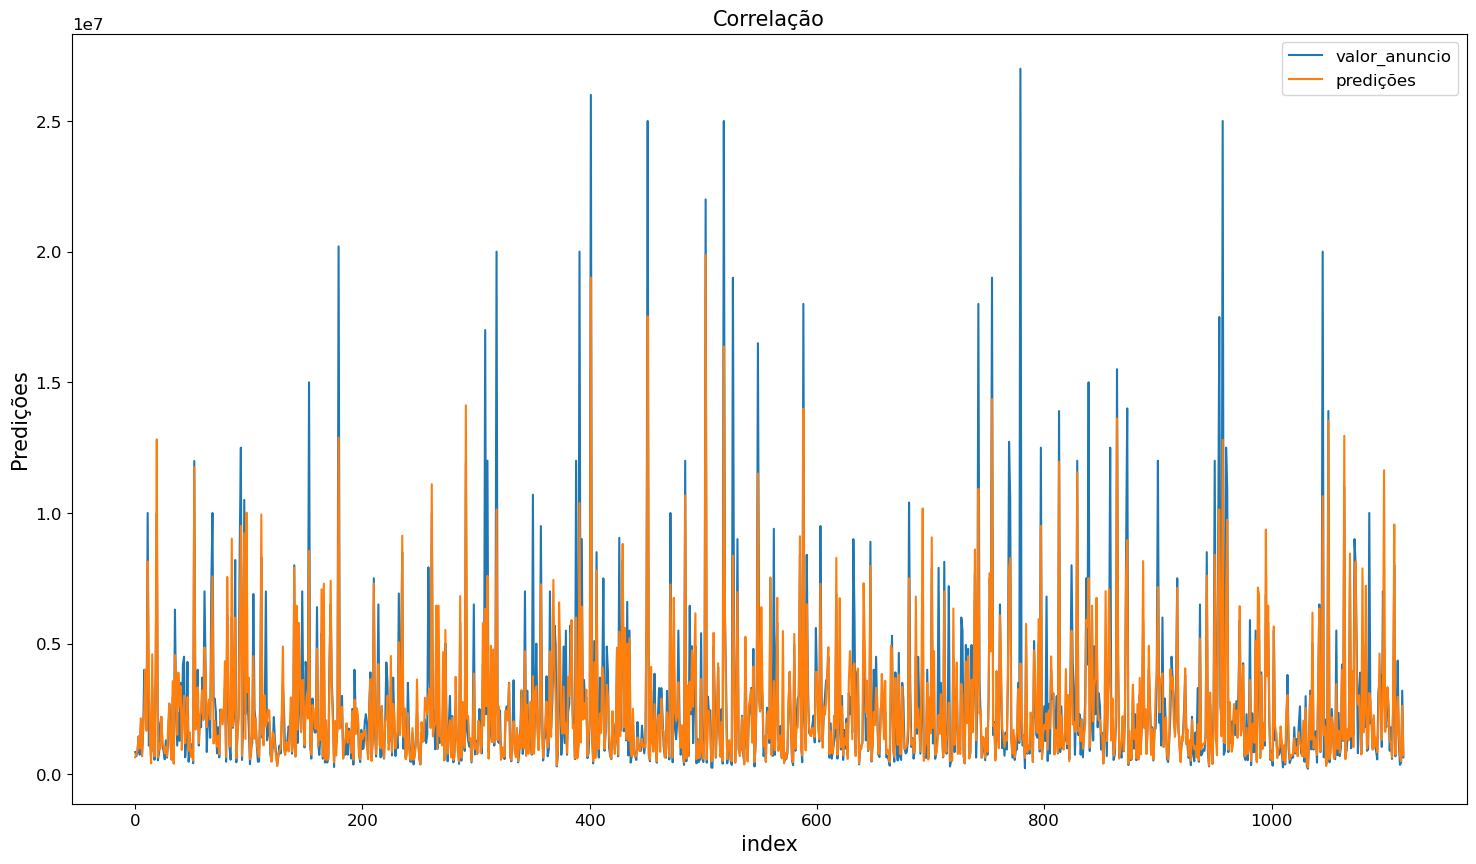

In [460]:
plt.figure(figsize=(18,10))

ax1 = sns.lineplot( x='index', y='valor_anuncio', data=data_erros, label='valor_anuncio', ci=None )
sns.lineplot( x='index', y='predições', data=data_erros, label='predições', ci=None )
data_load(ax1,'Correlação', 'index','Predições' )

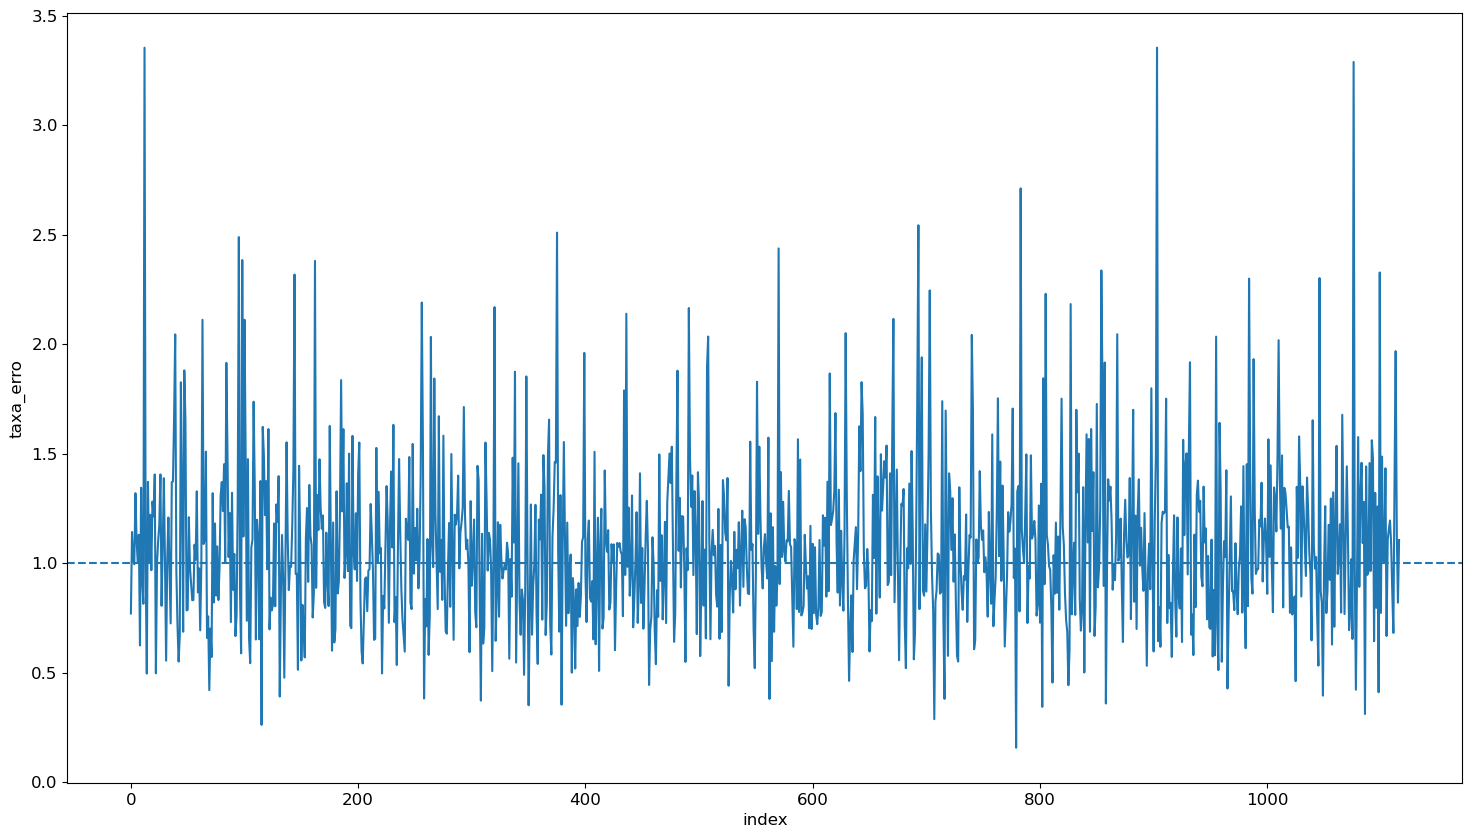

In [461]:
plt.figure(figsize=(18,10))

ax2 = sns.lineplot( x='index', y='taxa_erro', data=data_erros )
data_load(ax1,'Taxa de erro', 'index','Predições' )
plt.axhline( 1, linestyle='--')

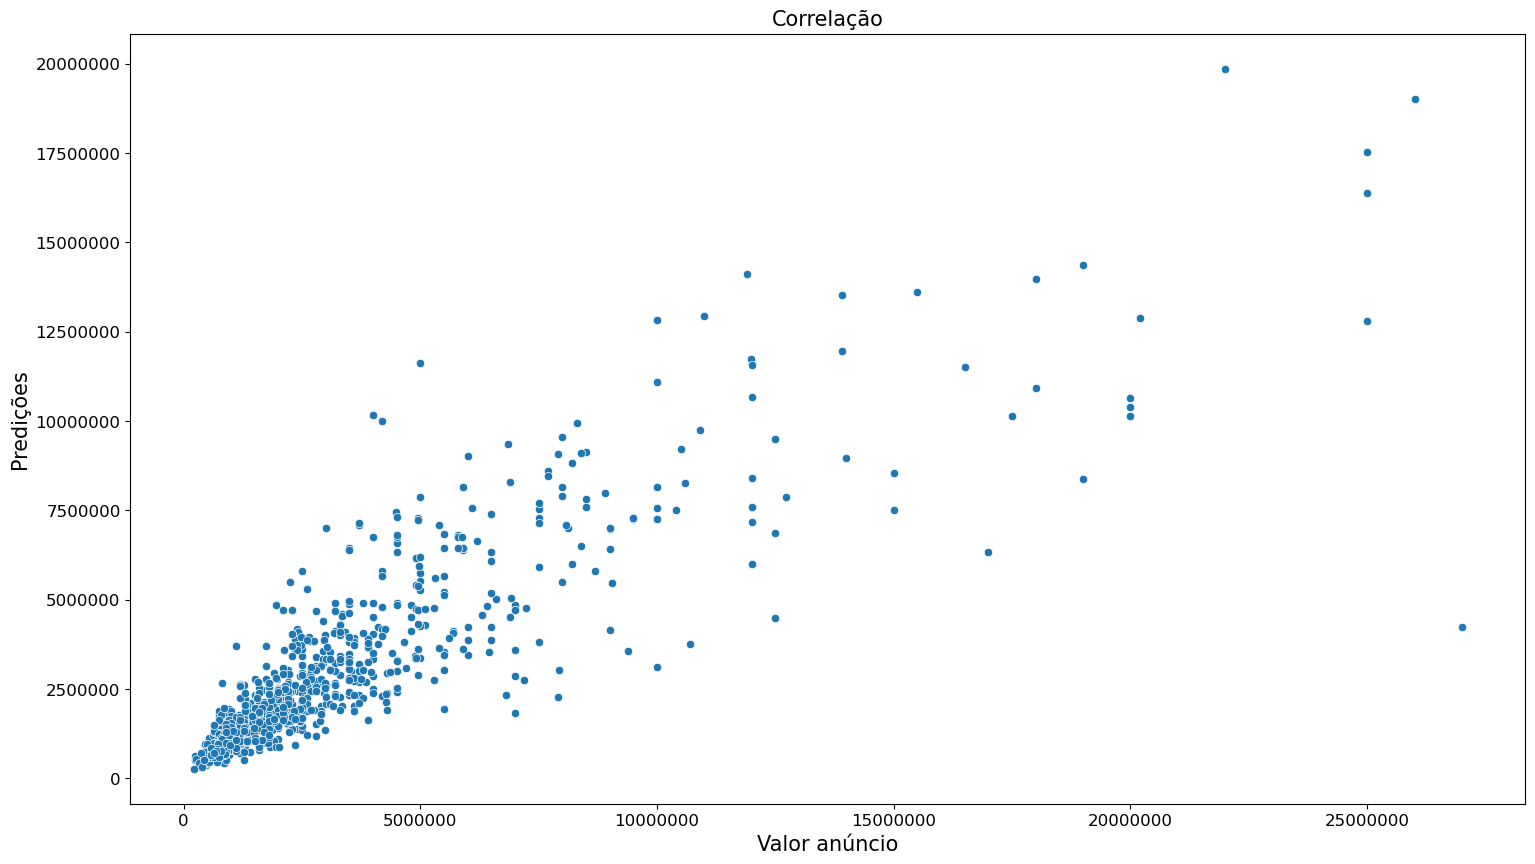

In [462]:
plt.figure(figsize=(18,10))

ax3 = sns.scatterplot(x = data_erros['valor_anuncio'], y = data_erros['predições'])
data_load(ax3,'Correlação', 'Valor anúncio','Predições' )

plt.subplots_adjust(hspace=0.3)  

ax3.ticklabel_format(style='plain', axis='x')
ax3.ticklabel_format(style='plain', axis='y')
  
    
plt.show()

# 13 Etapa API

## 13.1 Criação da classe Creditas

A classe Creditas foi criada com o objetivo de simplificar o processo de realização da API, através das etapas de limpeza e preparação dos dados.

In [110]:
import pickle
import pandas as pd
import numpy as np
import math

class Creditas(object):
    
    def __init__(self):
        
        self.Robust_scaler = pickle.load(open('models/Robust_scaler.pkl','rb'))
        
    def data_cleaning(self,df1):
        
        ##2.4 Formatação dos dados
        
        # Excluindo coluna inútil
        df1.drop(['tipo_anuncio','valor'], axis=1, inplace=True)

        # Excluindo colunas com valores únicos 
        df1.drop(['cidade','cod_grandes_regioes','nome_grande_regiao','cod_uf','nome_da_uf ','cod_meso','nome_da_meso','cod_micro','nome_da_micro','cod_rm',
                       'nome_da_rm','cod_municipio','nome_do_municipio','cod_bairro','nome_do_bairro'], axis=1, inplace=True)

        # Excluindo colunas que se repetem
        df1.drop(['cod_setor','cod_distrito','cod_subdistrito','nome_do_subdistrito'], axis=1, inplace=True)

        # Excluindo colunas que ja foram utilizadas e se tornaram inúteis
        df1.drop(['rua1','latitude','longitude','point'], axis=1, inplace=True)
        
        # Retirar notação científica do 'setor_censo' para deixa-lo mais legível
        df1['setor_censo'] = (df1[['setor_censo']]/1000000000)
        
        ## 2.5 Checando e Tratando os dados vazios


        # Hipótese: Se é NA, talvez seja pela falta de informação dos locais
        # O que foi feito: A melhor solução encontrada foi pegar a moda das variáveis vazias por BAIRRO e preencher os dados que estão vazios  
        # ja que os valores de cada bairro são semelhantes
        df1['mode1'] = df1['bairro'].apply(lambda x: df1[['setor_censo']]
                                          .loc[df1['bairro']==x,'setor_censo'].mode().values).str[0] 
        df1['setor_censo'] = df1.apply(lambda x: x['mode1'] if math.isnan(x['setor_censo']) else x['setor_censo'], axis=1)

        df1['mode2'] = df1['bairro'].apply(lambda x: df1[['nome_do_distrito']]
                                          .loc[df1['bairro']==x,'nome_do_distrito'].mode().values).str[0]
        df1['nome_do_distrito'] = df1.apply(lambda x: x['mode2'] if pd.isnull(x['nome_do_distrito']) else x['nome_do_distrito'], axis=1)

        df1['mode3'] = df1['bairro'].apply(lambda x: df1[['situacao_setor']]
                                          .loc[df1['bairro']==x,'situacao_setor'].mode().values).str[0] 
        df1['situacao_setor'] = df1.apply(lambda x: x['mode3'] if math.isnan(x['situacao_setor']) else x['situacao_setor'], axis=1)

        df1['mode4'] = df1['bairro'].apply(lambda x: df1[['tipo_setor']]
                                          .loc[df1['bairro']==x,'tipo_setor'].mode().values).str[0]
        df1['tipo_setor'] = df1.apply(lambda x: x['mode4'] if math.isnan(x['tipo_setor']) else x['tipo_setor'], axis=1)



        # Mesma idéia da solução acima, apenas trocando a MODA pela MÉDIA ja que são variáveis contínuas
        df1[['mean1','mean2','mean3','mean4','mean5',
                           'mean6','mean7','mean8','mean9','mean10',
                           'mean11','mean12']] = df1['bairro'].apply(lambda x: 
                                                                                   df1[['v001','v002','v003','v004','v005','v006',
                                                                                                      'v007','v008','v009','v010','v011','v012']].loc[df1['bairro']==x,['v001'
                                                                                                      ,'v002','v003','v004','v005','v006',
                                                                                                      'v007','v008','v009','v010','v011','v012']].mean())

        df1['v001'] = df1.apply(lambda x: x['mean1'] if math.isnan(x['v001']) else x['v001'], axis=1)

        df1['v002'] = df1.apply(lambda x: x['mean2'] if math.isnan(x['v002']) else x['v002'], axis=1)

        df1['v003'] = df1.apply(lambda x: x['mean3'] if math.isnan(x['v003']) else x['v003'], axis=1)

        df1['v004'] = df1.apply(lambda x: x['mean4'] if math.isnan(x['v004']) else x['v004'], axis=1)

        df1['v005'] = df1.apply(lambda x: x['mean5'] if math.isnan(x['v005']) else x['v005'], axis=1)

        df1['v006'] = df1.apply(lambda x: x['mean6'] if math.isnan(x['v006']) else x['v006'], axis=1)

        df1['v007'] = df1.apply(lambda x: x['mean7'] if math.isnan(x['v007']) else x['v007'], axis=1)

        df1['v008'] = df1.apply(lambda x: x['mean8'] if math.isnan(x['v008']) else x['v008'], axis=1)

        df1['v009'] = df1.apply(lambda x: x['mean9'] if math.isnan(x['v009']) else x['v009'], axis=1)

        df1['v010'] = df1.apply(lambda x: x['mean10'] if math.isnan(x['v010']) else x['v010'], axis=1)

        df1['v011'] = df1.apply(lambda x: x['mean11'] if math.isnan(x['v011']) else x['v011'], axis=1)

        df1['v012'] = df1.apply(lambda x: x['mean12'] if math.isnan(x['v012']) else x['v012'], axis=1)



        df1.drop(['mode1','mode2','mode3','mode4','mean1','mean2','mean3','mean4','mean5',
                                'mean6','mean7','mean8','mean9','mean10',
                                'mean11','mean12'], axis=1, inplace=True)

        # Hipótese: Se é NA, talvez seja pela falta de informação dos locais, pois são determinados bairros completamente sem informações em determinadas variáveis,
        # logo, não podemos achar moda, media ou mediana
        # O que foi feito:Apagaremos as outras 23 linhas ja que são bairros completamente sem informações e não conseguimos achar uma solução para elas
        df1 = df1.dropna()
    
        ## 2.6 Alterando os Tipos de Dados¶
    
        a = pd.CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ordered=True)
        df1['quartos'] = df1['quartos'].astype( a )

        b = pd.CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14], ordered=True)
        df1['banheiros'] = df1['banheiros'].astype( b )

        c = pd.CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13
                                            , 14, 15, 16, 20, 24, 25, 30, 38], ordered=True)
        df1['vagas'] = df1['vagas'].astype( c )

        df1['cep'] = df1['cep'].astype( str )

        df1['setor_censo'] = df1['setor_censo'].astype( str )

        d = pd.CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 8.0], ordered=True)
        df1['situacao_setor'] = df1['situacao_setor'].astype( d )

        e = pd.CategoricalDtype(categories=[0.0, 1.0], ordered=True)
        df1['tipo_setor'] = df1['tipo_setor'].astype( e )
        
        return df1
    
    def feature_engineering(self, df2):
        
        # 4 Filtrando o quadro de dados

        # Substituindo outlierss
        df2['valor_anuncio'] = df2['valor_anuncio'].apply(lambda x: 30000000 if (x > 30000000) else x)

        df2['metragem'] = df2['metragem'].apply(lambda x: 2850 if (x > 10000) else x)

        df2['v004'] = df2['v004'].apply(lambda x: 5.52 if (x > 6) else x)

        df2['v006'] = df2['v006'].apply(lambda x: 1781723643.14 if (x > 2000000000) else x)

        df2['v008'] = df2['v008'].apply(lambda x: 1374996829.42 if (x > 1500000000) else x)

        df2['v010'] = df2['v010'].apply(lambda x: 976628790.68 if (x > 1000000000) else x)

        df2['v012'] = df2['v012'].apply(lambda x: 1436259424.69 if (x > 1500000000) else x)
        
        df3 = df2.copy()
        
        ## 4.6 Engenharia de Recursos
        
        # sub regioes
        df3['sub_regiões'] = df3['cep'].str.extract('([0-9])')
        df3['sub_regiões'] = df3['sub_regiões'].astype(str)

        # setor
        df3['setor'] = df3['cep'].str[1]
        df3['setor'] = df3['setor'].astype(str)

        # sub setor
        df3['sub_setor'] = df3['cep'].str[2]
        df3['sub_setor'] = df3['sub_setor'].astype(str)

        # divisao sub setor
        df3['divisao_sub_setor'] = df3['cep'].str[3]
        df3['divisao_sub_setor'] = df3['divisao_sub_setor'].astype(str)

        # quant_dom_part
        df3['quant_dom_part'] = ''
        for idx, _ in df3.iterrows():
            if (df3['v001'].at[idx]<100):
                df3['quant_dom_part'].at[idx]='Pouco domicílio'
            elif (df3['v001'].at[idx]>=100) & (df3['v001'].at[idx]<200):
                df3['quant_dom_part'].at[idx]='Médio 1 domicílio'
            elif (df3['v001'].at[idx]>=200) & (df3['v001'].at[idx]<350):
                df3['quant_dom_part'].at[idx]='Médio 2 domicílio'
            else:
                df3['quant_dom_part'].at[idx]='Muito domicílio'
        
        # quant_mor
        df3['quant_mor'] = ''
        for idx, _ in df3.iterrows():
            if (df3['v002'].at[idx]<200):
                df3['quant_mor'].at[idx]='Pouco morador'
            elif (df3['v002'].at[idx]>=200) & (df3['v002'].at[idx]<400):
                df3['quant_mor'].at[idx]='Médio 1 morador'
            elif (df3['v002'].at[idx]>=400) & (df3['v002'].at[idx]<600):
                df3['quant_mor'].at[idx]='Médio 2 morador'
            else:
                df3['quant_mor'].at[idx]='Muito morador'
        
        return df3
    
    def atributo_frequencia(self, atributo):
    
        # Cria um dicionário de valores contáveis
        atributo_dict = atributo.value_counts().to_dict()
        
        # Armazena valores com Dataframe
        df_atributo_dict = pd.DataFrame(atributo_dict.items(), columns=['Value','Count'])
    
        # Calcula a frequência de cada valor
        df_atributo_dict['frequency'] = df_atributo_dict['Count'] / df_atributo_dict['Count'].sum()
        
        # Obtém um dicionário para a frequência
        atributo_frequencia = df_atributo_dict.set_index('Value').to_dict()['frequency']
        
        return atributo_frequencia


    def frequencias_codificadas(self, data_frame):
    
        # Cria um Dataframe vazio
        freq_codificada = pd.DataFrame()
    
        # Cria colunas de frequências
        for column in data_frame.columns:
            freq_codificada[column] = data_frame[column].map(atributo_frequencia(data_frame[column]))
        
        return freq_codificada
    
    def data_preparation(self, df5):
        
        categorical = df5[['bairro','quartos','banheiros','vagas','rua','cep','setor_censo','nome_do_distrito','sub_regiões','setor','sub_setor','divisao_sub_setor','quant_dom_part','quant_mor']]
        numerical = df5[['metragem','valor_anuncio','valor_mm','valor_m2','v001','v002','v003','v004','v005','v006','v007','v008','v009','v010','v011','v012']]
        binary = df5[['situacao_setor','tipo_setor']]
        
        Alvo_var = df5[['valor_anuncio']]
        Alvo_var['valor_anuncio'] = np.log1p( Alvo_var['valor_anuncio'] )
        
        numerical.drop(columns=['valor_anuncio'], inplace = True)
        
        numerical_1 = self.Robust_scaler.fit_transform(numerical[['metragem','valor_mm','valor_m2', 'v001', 'v002','v003','v004','v005','v006', 'v007', 'v008', 'v009', 'v010', 'v011','v012']].values)   
        numerical_2 = pd.DataFrame(numerical_1, columns=numerical[['metragem','valor_mm','valor_m2', 'v001', 'v002','v003','v004','v005','v006', 'v007', 'v008', 'v009', 'v010', 'v011','v012']].columns)
        
        categorical_2 = frequencias_codificadas(categorical)
        
        df6 = pd.concat([binary, numerical_2, categorical_2,Alvo_var], axis=1)
        df6 = df6.astype(float)
        df6 = df6[['metragem', 'vagas', 'banheiros', 'bairro', 'quartos', 'v011', 'v007', 'v005', 'v009', 'nome_do_distrito',
                  'cep', 'rua', 'setor_censo', 'setor', 'divisao_sub_setor', 'v003', 'sub_regiões', 'v004']]
        
        return df6
    
    def get_prediction( self, model, original_data, test_data ):
        
        # predição
        pred = model.predict( test_data )
        original_data['predição'] = np.expm1( pred )
        
        return original_data.to_json( orient='records', date_format='iso' )                        

## 13.2 API Handler

In [161]:
import os
import pickle
import json
import pandas as pd
from flask import Flask, request, Response
from creditas.Creditas import Creditas

# loading model
model = pickle.load( open( 'models/modelo_final.pkl', 'rb') )

# initialize API
app = Flask( __name__ )

@app.route( '/creditas/predict', methods=['POST'] )
def creditas_predict():
    test_json = request.get_json()
   
    if test_json: # there is data
        if isinstance( test_json, type(dict) ): # unique example
            test_raw = pd.DataFrame( test_json )
            
        else: # multiple example
            test_raw = pd.DataFrame( test_json )
            
        # Instantiate Rossmann class
        pipeline = Creditas()
        
        # data cleaning
        df1 = pipeline.data_cleaning( test_raw )
        
        # feature engineering
        df2 = pipeline.feature_engineering( df1 )
        
        # data preparation
        df3 = pipeline.data_preparation( df2 )
        
        # prediction
        df_response = pipeline.get_prediction( model, test_raw, df3 )
        
        return df_response
        
        
    else:
        return Response( '{}', status=200, mimetype='application/json' )

if __name__ == '__main__':
    port = os.environ.get('PORT',5000)
    app.run( host='0.0.0.0', port=port )

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.0.232:5000
Press CTRL+C to quit
127.0.0.1 - - [31/Oct/2023 12:43:55] "GET /creditas/predict HTTP/1.1" 405 -
127.0.0.1 - - [31/Oct/2023 12:44:06] "GET /creditas/predict HTTP/1.1" 405 -
192.168.0.232 - - [31/Oct/2023 12:44:38] "GET /creditas/predict HTTP/1.1" 405 -


## 13.3 Local API handler

Testando a API enquanto o API handler roda em ambiente local.

In [10]:
import pandas as pd
import pickle
import requests
import json
from flask import Flask, request, Response
import os

df_predict = data_vendas_censo.copy()
df_predict = df_predict.head(1)

# Convert test dataframe in json
data = json.dumps(df_predict.to_dict(orient='records'))

# API Call
url = 'http://0.0.0.0:5001/creditas/predict'
header = {'Content-type': 'application/json'}
#data = data

r = requests.post(url, data=data, headers=header)
print('Status Code {}'.format(r.status_code))

d1 = pd.DataFrame(r.json(), columns=r.json()[0].keys())

for i in range(len(d1)):
    
    print('O preço do imóvel {} selecionado é ${:,.2f}'.format(i,d1.loc[i, 'predição']))

Status Code 200
O preço do imóvel 0 selecionado é $1,991,415.15
